# 匯入模組

In [1]:
import numpy as np
import pandas as pd

# 轉檔

In [2]:
f=open(r"C:\Users\Admin\Desktop\vix_futures_cut.txt",'r')

In [3]:
print(f.readline(50))

contract	price	volume	date	midpoint	expire_day



In [5]:
c = list(f)

In [ ]:
train_data = pd.read_table(r'C:\Users\Admin\Desktop\vix_futures_cut.txt',iterator=True,header=None)

while True:
    try:
        chunk = train_data.get_chunk(5600000)
        chunk.columns = ['contract','price','volume','date','midpoint','expire_day']
        chunk.to_csv(r'D:\vix_futures_cut.csv', mode='a',header=False,index = None)
    except Exception as e:
        break

# 匯入

In [2]:
# ‪C:\Users\Admin\Desktop\vix_futures_1.csv

# 試作
test = pd.read_csv(r"C:\Users\Admin\Desktop\vix_futures_1.csv", error_bad_lines=False)
#2G檔
#test = pd.read_csv(r"C:\Users\x555l\Desktop\VIX Data\vix_futures.csv", error_bad_lines=False)

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
contract      9999 non-null object
time          9999 non-null int64
price         9999 non-null int64
type          9999 non-null object
volume        9999 non-null int64
sequence      9999 non-null int64
date          9999 non-null int64
ts            9999 non-null int64
midpoint      9999 non-null float64
initiate      9993 non-null float64
expire_day    9999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.4+ KB


In [4]:
test.describe()

,time,price,volume,sequence,date,ts,midpoint,initiate,expire_day
count,9999.000000,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9993.000000,9.999000e+03
mean,1138.383738,1732.230923,4.976498,1205.631363,1.429195e+07,84361.808981,1732.601960,-0.043731,1.678480e+07
std,211.741254,232.807056,5.759790,126.483548,8.578647e+06,66592.437188,232.598516,0.999093,1.691541e+06
min,830.000000,1230.000000,1.000000,1021.000000,1.042004e+06,3.000000,1228.000000,-1.000000,1.310200e+07
25%,936.000000,1557.500000,1.000000,1087.000000,7.092004e+06,24759.500000,1557.500000,-1.000000,1.606200e+07
50%,1118.000000,1747.000000,3.000000,1189.000000,1.308200e+07,76941.000000,1746.000000,-1.000000,1.711200e+07
75%,1330.000000,1921.000000,10.000000,1321.000000,2.112200e+07,135482.500000,1922.750000,1.000000,1.808200e+07
max,1515.000000,2203.000000,125.000000,1426.000000,3.112200e+07,271742.000000,2195.500000,1.000000,1.905200e+07


In [5]:
test.head(5)

,contract,time,price,type,volume,sequence,date,ts,midpoint,initiate,expire_day
0,F.US.VXK04,1013,1990,T,1,1124,29032004,4,1985.0,1.0,19052004
1,F.US.VXK04,1102,1984,T,1,1173,29032004,72,1986.0,-1.0,19052004
2,F.US.VXK04,1201,1980,T,1,1232,29032004,117,1982.5,-1.0,19052004
3,F.US.VXK04,1202,1983,T,1,1233,29032004,122,1983.5,-1.0,19052004
4,F.US.VXK04,1300,1980,T,3,1291,29032004,168,1981.0,-1.0,19052004


# 調整日期格式

In [6]:
#對交易日
date = np.unique(test.date)
date = date.astype('str').tolist()

In [7]:
#補缺值
def fill_zero(x):
    if len(x)==7:
        x = '0' + x
    return x


In [8]:
date_list_true = [fill_zero(x) for x in date]
date_list_true = pd.to_datetime(date_list_true, format='%d%m%Y')

In [9]:
date_list_true

DatetimeIndex(['2004-04-01', '2004-06-01', '2004-07-01', '2004-09-01',
               '2004-10-01', '2004-11-01', '2004-12-01', '2004-04-02',
               '2004-06-02', '2004-07-02',
               ...
               '2004-04-30', '2004-06-30', '2004-07-30', '2004-08-30',
               '2004-09-30', '2004-11-30', '2004-12-30', '2004-03-31',
               '2004-08-31', '2004-12-31'],
              dtype='datetime64[ns]', length=204, freq=None)

In [10]:
date_df = pd.DataFrame({'true_date' : date_list_true, 'date':np.unique(test.date)})

In [11]:
test2 = pd.merge(test, date_df, how = 'left', on= 'date')

# 到期日格式更改

In [12]:
#對期貨到期日

expire_day = np.unique(test.expire_day)
expire_day = expire_day.astype('str').tolist()

In [13]:
expire_day_list_true = [fill_zero(x) for x in expire_day]
expire_day_list_true = pd.to_datetime(expire_day_list_true, format='%d%m%Y')

In [14]:
expire_day_df = pd.DataFrame({'true_expire_day' : expire_day_list_true, 'expire_day':np.unique(test.expire_day)})

In [15]:
test3 = pd.merge(test2, expire_day_df, how = 'left', on= 'expire_day')

In [16]:
test3 = test3.drop(columns=['date', 'expire_day','type'])

In [17]:
test3.head()

,contract,time,price,volume,sequence,ts,midpoint,initiate,true_date,true_expire_day
0,F.US.VXK04,1013,1990,1,1124,4,1985.0,1.0,2004-03-29,2004-05-19
1,F.US.VXK04,1102,1984,1,1173,72,1986.0,-1.0,2004-03-29,2004-05-19
2,F.US.VXK04,1201,1980,1,1232,117,1982.5,-1.0,2004-03-29,2004-05-19
3,F.US.VXK04,1202,1983,1,1233,122,1983.5,-1.0,2004-03-29,2004-05-19
4,F.US.VXK04,1300,1980,3,1291,168,1981.0,-1.0,2004-03-29,2004-05-19


# 

In [18]:
test3.sort_values(["true_expire_day","true_date"],ascending=[1, 1])

,contract,time,price,volume,sequence,ts,midpoint,initiate,true_date,true_expire_day
0,F.US.VXK04,1013,1990,1,1124,4,1985.0,1.0,2004-03-29,2004-05-19
1,F.US.VXK04,1102,1984,1,1173,72,1986.0,-1.0,2004-03-29,2004-05-19
2,F.US.VXK04,1201,1980,1,1232,117,1982.5,-1.0,2004-03-29,2004-05-19
3,F.US.VXK04,1202,1983,1,1233,122,1983.5,-1.0,2004-03-29,2004-05-19
4,F.US.VXK04,1300,1980,3,1291,168,1981.0,-1.0,2004-03-29,2004-05-19
5,F.US.VXK04,1303,1978,2,1294,176,1976.0,1.0,2004-03-29,2004-05-19
6,F.US.VXK04,1304,1975,1,1295,184,1973.5,1.0,2004-03-29,2004-05-19
7,F.US.VXK04,1314,1981,1,1305,208,1978.0,1.0,2004-03-29,2004-05-19
8,F.US.VXK04,1335,1978,1,1326,243,1979.0,-1.0,2004-03-29,2004-05-19
9,F.US.VXK04,1338,1982,1,1329,256,1981.0,1.0,2004-03-29,2004-05-19


In [19]:
test3[test3['true_date']=='2004-03-29']

,contract,time,price,volume,sequence,ts,midpoint,initiate,true_date,true_expire_day
0,F.US.VXK04,1013,1990,1,1124,4,1985.0,1.0,2004-03-29,2004-05-19
1,F.US.VXK04,1102,1984,1,1173,72,1986.0,-1.0,2004-03-29,2004-05-19
2,F.US.VXK04,1201,1980,1,1232,117,1982.5,-1.0,2004-03-29,2004-05-19
3,F.US.VXK04,1202,1983,1,1233,122,1983.5,-1.0,2004-03-29,2004-05-19
4,F.US.VXK04,1300,1980,3,1291,168,1981.0,-1.0,2004-03-29,2004-05-19
5,F.US.VXK04,1303,1978,2,1294,176,1976.0,1.0,2004-03-29,2004-05-19
6,F.US.VXK04,1304,1975,1,1295,184,1973.5,1.0,2004-03-29,2004-05-19
7,F.US.VXK04,1314,1981,1,1305,208,1978.0,1.0,2004-03-29,2004-05-19
8,F.US.VXK04,1335,1978,1,1326,243,1979.0,-1.0,2004-03-29,2004-05-19
9,F.US.VXK04,1338,1982,1,1329,256,1981.0,1.0,2004-03-29,2004-05-19


# 列出到期月清單(日後區分商品別用)

In [20]:
month  = test3.drop_duplicates(subset='true_expire_day', keep='first', inplace=False)
vix_fut_month = []
vix_fut_month = month['true_expire_day']
vix_fut_month

0      2004-05-19
812    2004-06-16
1940   2004-07-14
2579   2004-08-18
4340   2004-09-15
5210   2004-10-13
5907   2004-11-17
8962   2005-01-19
9716   2005-02-16
Name: true_expire_day, dtype: datetime64[ns]

In [21]:
#vol.drop(columns=['time', 'ts','midpoint','price','contract'])

# 取開高低收

In [22]:
#test3.groupby(['true_expire_day','true_date'])['price'].head(1)
maxx = test3.groupby(['true_expire_day','true_date'], group_keys=False)['price'].max()
# test3.groupby(['true_expire_day','true_date'])['price'].tail(1)
minn = test3.groupby(['true_expire_day','true_date'], group_keys=False)['price'].min()
open_value= test3.groupby(['true_expire_day','true_date'], group_keys=False)['price'].head(1).values
close = test3.groupby(['true_expire_day','true_date'], group_keys=False)['price'].tail(1).values

In [23]:
df_all = pd.DataFrame([maxx,minn]).transpose()

In [24]:
df_all['open'] = test3.groupby(['true_expire_day','true_date'], group_keys=False)['price'].head(1).values
df_all['close'] = test3.groupby(['true_expire_day','true_date'], group_keys=False)['price'].tail(1).values
df_all['vol'] = test3.groupby(['true_expire_day','true_date'], group_keys=False)['volume'].sum().values
#買or賣 方發起的買賣
#df_all['initiate'] = test3.groupby(['true_expire_day','true_date'], group_keys=False)['initiate'].sum().values

In [25]:
#df_all.columns  = ['high','low','open','close','vol','initiate']
df_all.columns  = ['high','low','open','close','vol']

In [26]:
# 見一表備用
strategy = df_all.drop(columns=['high', 'low'])
df_all.head()

high   low  open  close  vol
true_expire_day true_date                               
2004-05-19      2004-03-29  1990  1975  1990   1977   31
                2004-03-30  2004  1961  1986   1961  110
                2004-03-31  1981  1967  1967   1972   45
                2004-04-01  1999  1964  1987   1965   84
                2004-04-02  1947  1884  1947   1898   89

In [27]:
df_all.reset_index()

,true_expire_day,true_date,high,low,open,close,vol
0,2004-05-19,2004-03-29,1990,1975,1990,1977,31
1,2004-05-19,2004-03-30,2004,1961,1986,1961,110
2,2004-05-19,2004-03-31,1981,1967,1967,1972,45
3,2004-05-19,2004-04-01,1999,1964,1987,1965,84
4,2004-05-19,2004-04-02,1947,1884,1947,1898,89
5,2004-05-19,2004-04-05,1880,1855,1873,1862,84
6,2004-05-19,2004-04-06,1889,1857,1857,1876,154
7,2004-05-19,2004-04-07,1925,1889,1897,1913,127
8,2004-05-19,2004-04-08,1915,1895,1895,1901,97
9,2004-05-19,2004-04-12,1878,1870,1878,1870,5


In [26]:
#test3[['price', 'true_date',"true_expire_day"]]
#vol = test3.groupby(by=["true_date","true_expire_day"]).sum(by = 'volume')
#open = test3[['price', 'true_date',"true_expire_day"]].sort_values(["true_expire_day","true_date"],ascending=[1, 1]).groupby('true_date', group_keys =False).apply(lambda x : x.iloc[0,0])
#high =  test2[['price', 'true_date']].groupby("true_date", group_keys =False).apply(lambda x : max(x.price))

In [26]:
#vol = test2.groupby(by="true_date").sum(by = 'volume')
#open = test2[['price', 'true_date']].groupby('true_date', group_keys =False).apply(lambda x : x.iloc[0,0])
#high =  test2[['price', 'true_date']].groupby("true_date", group_keys =False).apply(lambda x : x.max())
#low = test2[['price', 'true_date']].groupby("true_date", group_keys =False).apply(lambda x : x.min())
#close =  test2[['price', 'true_date']].groupby("true_date", group_keys =False).apply(lambda x : x.iloc[0,-2])

# 繪圖

In [54]:
import matplotlib as mpl
import tushare as ts
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ochl as candlestick_ochl
from mpl_finance import candlestick_ohlc as candlestick_ohlc
%matplotlib inline


In [31]:
# 设置历史数据区间
date1 = (2004, 3, 29) # 起始日期，格式：(年，月，日)元组
date2 = (2004, 5, 19)

##  df_all.reset_index()  #將groupby後轉回一般DataFrame

In [42]:
pic_chart = df_all.reset_index().drop(columns=['vol'])

In [44]:
pic_chart.head()

,true_date,high,close,high,low,true_expire_day
0,2004-03-29,1990,1977,1990,1975,2004-05-19
1,2004-03-30,2004,1961,2004,1961,2004-05-19
2,2004-03-31,1981,1972,1981,1967,2004-05-19
3,2004-04-01,1999,1965,1999,1964,2004-05-19
4,2004-04-02,1947,1898,1947,1884,2004-05-19


In [43]:
pic_chart = pic_chart[['true_date','high','close','high','low','true_expire_day']]

In [ ]:
pic_chart['true_expire_day'] = pic_chart.true_expire_day(5)

In [ ]:
pic_chart['true_expire_day'].strftime('%Y%m%d')

In [36]:
def date_to_num(dates):
    num_time = []
    for date in dates:
        date_time = datetime.datetime.strptime(date,'%Y-%m-%d')
        num_date = date2num(date_time)
        num_time.append(num_date)
    return num_time

In [48]:
date_time  = pic_chart['true_date']

In [ ]:
# dataframe转换为二维数组
mat_wdyx = pic_chart.as_matrix()
num_time = date_to_num(mat_wdyx[:,0])
mat_wdyx[:,0] = num_time
#         日期,   开盘,     收盘,    最高,      最低,   成交量,    代码
mat_wdyx[:3]

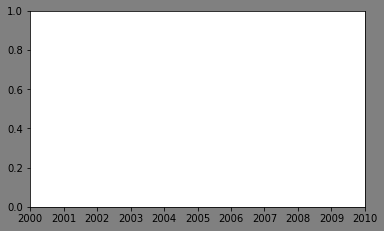

In [51]:
# 从雅虎财经中获取股票代码601558的历史行情
#quotes = mpf.quotes_historical_yahoo_ohlc('601558.ss', date1, date2)
# 创建一个子图 
fig, ax = plt.subplots(facecolor=(0.5, 0.5, 0.5))
fig.subplots_adjust(bottom=0.2)
# 设置X轴刻度为日期时间
ax.xaxis_date()

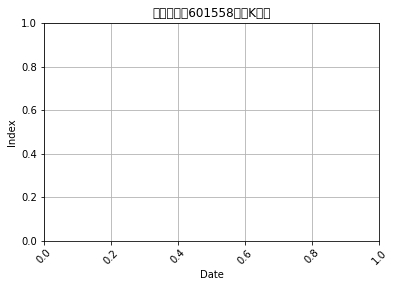

In [63]:
# X轴刻度文字倾斜45度
plt.xticks(rotation=45)
plt.title("股票代码：601558两年K线图")
plt.xlabel("Date")

plt.ylabel("Index")
# candlestick_ohlc
#candlestick_ochl(ax,mat_wdyx, colorup='k' , colordown='r')

#candlestick_ohlc(ax, open_value, maxx, minn, close, width=4,colorup='k', colordown='r',alpha=0.75)
plt.grid(True)

# 計算策略值RB

In [28]:
rb = df_all['open']-df_all['close']
rb = abs(rb)/df_all['close']

In [29]:
df_all['rb'] = rb.values

## 計算 
    upper shadow -> us  (high - open)
    lower shadow -> ls  (close - low)
    middle of rb -> mrb (open+close) / 2

In [30]:
us = df_all['high'] - df_all['open']
ls = df_all['close'] - df_all['low']
mrb = (df_all['open'] + df_all['close']) / 2

In [31]:
df_all['us'] = us.values
df_all['ls'] = ls.values
df_all['mrb'] = mrb.values

# 將rb區分為長中短星  
## 主要區分方式採 10 /30 /70四分位距
    ## 星 rb < P10                   代數   1
    ## 短 P10 rb < P30               代數   2
    ## 中 P30 < rb < P70             代數   3
    ## 長 rb > P70                   代數   4

In [32]:
df_all.describe()

,high,low,open,close,vol,rb,us,ls,mrb
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,1839.611009,1809.018349,1827.471560,1820.812844,91.302752,0.011874,12.139450,11.794495,1824.142202
std,238.401630,242.571570,238.401508,242.575333,109.873934,0.012280,16.810875,16.202361,240.065873
min,1280.000000,1230.000000,1265.000000,1233.000000,1.000000,0.000000,0.000000,0.000000,1257.000000
25%,1640.000000,1609.000000,1631.000000,1625.000000,18.000000,0.003058,0.000000,0.000000,1627.000000
50%,1908.000000,1864.000000,1890.000000,1878.000000,52.000000,0.007937,6.000000,6.000000,1885.500000
75%,2030.000000,2010.000000,2021.000000,2020.000000,126.000000,0.015710,17.000000,17.000000,2023.000000
max,2203.000000,2185.000000,2203.000000,2190.000000,735.000000,0.078767,109.000000,102.000000,2196.500000


In [33]:
p10 = df_all['rb'].quantile(q=0.10)
p30 = df_all['rb'].quantile(q=0.30)
p70 = df_all['rb'].quantile(q=0.70)

In [34]:
def rb_size(x):
    if x<= p10:
        x = 1
    elif (p10 < x <= p30):
        x = 2
    elif (p30 < x < p70):
        x = 3
    else:
        x = 4
    return x

In [35]:
rb_len = df_all['rb'].astype(float).tolist()
rb_type = [rb_size(x) for x in rb_len]
df_all['rb_long'] = rb_type
df_all

high   low  open  close  vol        rb  us   ls  \
true_expire_day true_date                                                     
2004-05-19      2004-03-29  1990  1975  1990   1977   31  0.006576   0    2   
                2004-03-30  2004  1961  1986   1961  110  0.012749  18    0   
                2004-03-31  1981  1967  1967   1972   45  0.002535  14    5   
                2004-04-01  1999  1964  1987   1965   84  0.011196  12    1   
                2004-04-02  1947  1884  1947   1898   89  0.025817   0   14   
                2004-04-05  1880  1855  1873   1862   84  0.005908   7    7   
                2004-04-06  1889  1857  1857   1876  154  0.010128  32   19   
                2004-04-07  1925  1889  1897   1913  127  0.008364  28   24   
                2004-04-08  1915  1895  1895   1901   97  0.003156  20    6   
                2004-04-12  1878  1870  1878   1870    5  0.004278   0    0   
                2004-04-13  1931  1889  1900   1931   25  0.016054  31   42   
                2004-04-14  1950  1938  1938   1943  108  0.002573  12    5   
                2004-04-15  1944  1926  1933   1926   42  0.003634  11    0   
                2004-04-16  1919  1900  1918   1901   61  0.008943   1    1   
                2004-04-19  1914  1885  1910   1885   11  0.013263   4    0   
                2004-04-20  1911  1865  1887   1911  125  0.012559  24   46   
                2004-04-21  1910  1864  1909   1866   11  0.023044   1    2   
                2004-04-22  1855  1714  1855   1727   95  0.074117   0   13   
                2004-04-23  1750  1723  1723   1730  101  0.004046  27    7   
                2004-04-26  1739  1723  1730   1723   46  0.004063   9    0   
                2004-04-27  1712  1650  1712   1674   87  0.022700   0   24   
                2004-04-28  1751  1700  1705   1750  185  0.025714  46   50   
                2004-04-29  1791  1723  1723   1780  174  0.032022  68   57   
                2004-04-30  1828  1754  1754   1828   31  0.040481  74   74   
                2004-05-03  1800  1780  1800   1780   42  0.011236   0    0   
                2004-05-04  1768  1685  1760   1685   36  0.044510   8    0   
                2004-05-05  1705  1653  1704   1660  139  0.026506   1    7   
                2004-05-06  1765  1685  1685   1750   41  0.037143  80   65   
                2004-05-07  1814  1712  1754   1814  136  0.033076  60  102   
                2004-05-10  1958  1860  1879   1942  219  0.032441  79   82   
...                          ...   ...   ...    ...  ...       ...  ..  ...   
2005-02-16      2004-07-28  2159  2140  2140   2150    8  0.004651  19   10   
                2004-07-29  2179  2156  2156   2179   46  0.010555  23   23   
                2004-07-30  2159  2157  2159   2157    3  0.000927   0    0   
                2004-08-02  2150  2150  2150   2150    3  0.000000   0    0   
                2004-08-03  2160  2155  2159   2160   14  0.000463   1    5   
                2004-08-04  2175  2160  2160   2160   20  0.000000  15    0   
                2004-08-05  2175  2160  2160   2170   35  0.004608  15   10   
                2004-08-06  2203  2183  2203   2190   51  0.005936   0    7   
                2004-08-09  2190  2185  2190   2186   10  0.001830   0    1   
                2004-08-10  2190  2154  2190   2154   15  0.016713   0    0   
                2004-08-11  2153  2153  2153   2153    4  0.000000   0    0   
                2004-08-12  2173  2165  2165   2173   11  0.003682   8    8   
                2004-08-13  2180  2166  2176   2166    7  0.004617   4    0   
                2004-08-16  2163  2157  2157   2163    7  0.002774   6    6   
                2004-08-17  2167  2151  2167   2151   20  0.007438   0    0   
                2004-08-18  2143  2130  2143   2130   25  0.006103   0    0   
                2004-08-19  2144  2144  2144   2144    1  0.000000   0    0   
                2004-08-23  2148  2144  2144   2148    5  0.001862   4    4   

# K棒紅黑 (1為漲W/0為跌B)

In [36]:
tr = df_all['open'] > df_all['close']
df_all['R_D'] = tr.astype('int')
df_all.head(10)

high   low  open  close  vol        rb  us  ls  \
true_expire_day true_date                                                    
2004-05-19      2004-03-29  1990  1975  1990   1977   31  0.006576   0   2   
                2004-03-30  2004  1961  1986   1961  110  0.012749  18   0   
                2004-03-31  1981  1967  1967   1972   45  0.002535  14   5   
                2004-04-01  1999  1964  1987   1965   84  0.011196  12   1   
                2004-04-02  1947  1884  1947   1898   89  0.025817   0  14   
                2004-04-05  1880  1855  1873   1862   84  0.005908   7   7   
                2004-04-06  1889  1857  1857   1876  154  0.010128  32  19   
                2004-04-07  1925  1889  1897   1913  127  0.008364  28  24   
                2004-04-08  1915  1895  1895   1901   97  0.003156  20   6   
                2004-04-12  1878  1870  1878   1870    5  0.004278   0   0   

                               mrb  rb_long  R_D  
true_expire_day true_date                         
2004-05-19      2004-03-29  1983.5        3    1  
                2004-03-30  1973.5        3    1  
                2004-03-31  1969.5        2    0  
                2004-04-01  1976.0        3    1  
                2004-04-02  1922.5        4    1  
                2004-04-05  1867.5        3    1  
                2004-04-06  1866.5        3    0  
                2004-04-07  1905.0        3    0  
                2004-04-08  1898.0        2    0  
                2004-04-12  1874.0        3    1

## DaekCloidCover ( 2C / 3P / SELL)

In [37]:
DaekCloidCover_cd1 = (df_all.R_D == 1) & (df_all.rb_long == 4)
DaekCloidCover_cd2 = (df_all.R_D == 0) & (df_all.rb_long == 4)
#DaekCloidCover_cd2 = DaekCloidCover_cd2.shift(-1).dropna()
o2Hc1 =(df_all.open - df_all.close.shift(1)) >= 0 
c2Ho1 =(df_all.close - df_all.open.shift(1)) > 0 
c2Lmrb1 = (df_all.close - df_all.mrb.shift(1)) < 0
#DaekCloidCover_getit = (DaekCloidCover_cd1+DaekCloidCover_cd2+o2Hc1+c2Ho1+c2Lmrb1)

In [38]:
DaekCloidCover = pd.DataFrame([DaekCloidCover_cd1,DaekCloidCover_cd2,o2Hc1,c2Ho1,c2Lmrb1]).astype('int').transpose().dropna()
DaekCloidCover.columns  = ['cd1','cd2','o2Hc1','c2Hc1','c2Lmrb1']
DaekCloidCover['DaekCloidCover_getit'] =  DaekCloidCover['cd1'].shift(1) + DaekCloidCover['cd2'] + DaekCloidCover['o2Hc1'] +DaekCloidCover['c2Hc1'] +DaekCloidCover['c2Lmrb1'] 
DaekCloidCover = DaekCloidCover.fillna(0)
DaekCloidCover['DaekCloidCover_getit'].max()


4.0

In [39]:
DaekCloidCover['DaekCloidCover_getit'] = (DaekCloidCover['DaekCloidCover_getit'] == 5).astype('int')
DaekCloidCover

cd1  cd2  o2Hc1  c2Hc1  c2Lmrb1  \
true_expire_day true_date                                     
2004-05-19      2004-03-29    0    0      0      0        0   
                2004-03-30    0    0      1      0        1   
                2004-03-31    0    0      1      0        1   
                2004-04-01    0    0      1      0        1   
                2004-04-02    1    0      0      0        1   
                2004-04-05    0    0      0      0        1   
                2004-04-06    0    0      0      1        0   
                2004-04-07    0    0      1      1        0   
                2004-04-08    0    0      0      1        1   
                2004-04-12    0    0      0      0        1   
                2004-04-13    0    1      1      1        0   
                2004-04-14    0    0      1      1        0   
                2004-04-15    0    0      0      0        1   
                2004-04-16    0    0      0      0        1   
                2004-04-19    0    0      1      0        1   
                2004-04-20    0    0      1      1        0   
                2004-04-21    1    0      0      0        1   
                2004-04-22    1    0      0      0        1   
                2004-04-23    0    0      0      0        1   
                2004-04-26    0    0      1      0        1   
                2004-04-27    1    0      0      0        1   
                2004-04-28    0    1      1      1        0   
                2004-04-29    0    1      0      1        0   
                2004-04-30    0    1      0      1        0   
                2004-05-03    0    0      0      1        1   
                2004-05-04    1    0      0      0        1   
                2004-05-05    1    0      1      0        1   
                2004-05-06    0    1      1      1        0   
                2004-05-07    0    1      1      1        0   
                2004-05-10    0    1      1      1        0   
...                         ...  ...    ...    ...      ...   
2005-02-16      2004-07-28    0    0      1      1        0   
                2004-07-29    0    0      1      1        0   
                2004-07-30    0    0      0      1        1   
                2004-08-02    0    0      0      0        1   
                2004-08-03    0    0      1      1        0   
                2004-08-04    0    0      1      1        0   
                2004-08-05    0    0      1      1        0   
                2004-08-06    0    0      1      1        0   
                2004-08-09    0    0      1      0        1   
                2004-08-10    1    0      1      0        1   
                2004-08-11    0    0      0      0        1   
                2004-08-12    0    0      1      1        0   
                2004-08-13    0    0      1      1        1   
                2004-08-16    0    0      0      0        1   
                2004-08-17    0    0      1      0        1   
                2004-08-18    0    0      0      0        1   
                2004-08-19    0    0      1      1        0   
                2004-08-23    0    0      1      1        0   
                2004-08-24    0    0      0      0        1   
                2004-08-25    1    0      1      0        1   
                2004-08-26    0    0      1      0        1   
                2004-08-27    0    0      1      0        1   
                2004-08-30    0    0      1      1        0   
                2004-08-31    0    0      0      0        1   
                2004-09-01    0    0      1      0        1   
                2004-09-02    1    0      1      0        1   
                2004-09-03    0    0      0      0        1   
                2004-09-07    1    0      1      0        1   
                2004-09-08    0    0      1      0        1   
                2004-09-09    1    0      1      0        1   

                            DaekCloidCover_getit  
true_ex

## Doji  ( 1C / 2P / BUY )

In [40]:
Doji_cd1 = df_all.rb_long == 1
us1H3rb1 = (df_all.us - 3 * df_all.rb) > 0
ls1H3rb1 = (df_all.ls - 3 * df_all.rb) > 0
#Doji_getit = (Doji_cd1 + us1H3rb1 + ls1H3rb1 ) == 3

In [41]:
Doji = pd.DataFrame([Doji_cd1,us1H3rb1,ls1H3rb1]).astype('int').transpose()
Doji.columns  = ['cd1','us1H3rb1','ls1H3rb1']
Doji['Doji_getit'] = Doji['cd1'] + Doji['us1H3rb1'] + Doji['ls1H3rb1']
Doji = Doji.fillna(0)
Doji['Doji_getit'].max()

3

In [42]:
Doji['Doji_getit'] = ( Doji['Doji_getit'] == 3).astype('int')
Doji['Doji_getit'].sum()

14

In [43]:
Doji

cd1  us1H3rb1  ls1H3rb1  Doji_getit
true_expire_day true_date                                      
2004-05-19      2004-03-29    0         0         1           0
                2004-03-30    0         1         0           0
                2004-03-31    0         1         1           0
                2004-04-01    0         1         1           0
                2004-04-02    0         0         1           0
                2004-04-05    0         1         1           0
                2004-04-06    0         1         1           0
                2004-04-07    0         1         1           0
                2004-04-08    0         1         1           0
                2004-04-12    0         0         0           0
                2004-04-13    0         1         1           0
                2004-04-14    0         1         1           0
                2004-04-15    0         1         0           0
                2004-04-16    0         1         1           0
                2004-04-19    0         1         0           0
                2004-04-20    0         1         1           0
                2004-04-21    0         1         1           0
                2004-04-22    0         0         1           0
                2004-04-23    0         1         1           0
                2004-04-26    0         1         0           0
                2004-04-27    0         0         1           0
                2004-04-28    0         1         1           0
                2004-04-29    0         1         1           0
                2004-04-30    0         1         1           0
                2004-05-03    0         0         0           0
                2004-05-04    0         1         0           0
                2004-05-05    0         1         1           0
                2004-05-06    0         1         1           0
                2004-05-07    0         1         1           0
                2004-05-10    0         1         1           0
...                         ...       ...       ...         ...
2005-02-16      2004-07-28    0         1         1           0
                2004-07-29    0         1         1           0
                2004-07-30    0         0         0           0
                2004-08-02    1         0         0           0
                2004-08-03    1         1         1           1
                2004-08-04    1         1         0           0
                2004-08-05    0         1         1           0
                2004-08-06    0         0         1           0
                2004-08-09    0         0         1           0
                2004-08-10    0         0         0           0
                2004-08-11    1         0         0           0
                2004-08-12    0         1         1           0
                2004-08-13    0         1         0           0
                2004-08-16    0         1         1           0
                2004-08-17    0         0         0           0
                2004-08-18    0         0         0           0
                2004-08-19    1         0         0           0
                2004-08-23    0         1         1           0
                2004-08-24    1         1         0           0
                2004-08-25    0         0         0           0
                2004-08-26    0         0         0           0
                2004-08-27    0         0         0           0
                2004-08-30    0         1         1           0
                2004-08-31    0         0         0           0
                2004-09-01    1         0         0           0
                2004-09-02    0         0         0           0
                2004-09-03    0         0         0           0
                2004-09-07    0         0         0           0
                2004-09-08    0         1         0           0
                2004-09-09    0         1         0         

## Doji Star (2C / 3P / SELL)

In [44]:
DojiStar_cd1 = (df_all.R_D == 1) & (df_all.rb_long == 4)
DojiStar_cd2 = df_all.rb_long == 1
c1Lh2 = (df_all.close.shift(1) - df_all.high) < 0
us2H3rb2 = (df_all.us - 3 * df_all.rb) > 0
ls2H3rb2 = (df_all.ls - 3 * df_all.rb) > 0
#DojiStar_getit = (DojiStar_cd1 + DojiStar_cd2 + c1Lh2 + us2H3rb2 + ls2H3rb2) == 5

In [45]:
DojiStar = pd.DataFrame([DojiStar_cd1,DojiStar_cd2,c1Lh2,us2H3rb2,ls2H3rb2]).astype('int').transpose()
DojiStar.columns  = ['cd1','cd2','c1Lh2','us2H3rb2','ls2H3rb2']
DojiStar['DojiStar_getit'] = DojiStar['cd1'].shift(1) + DojiStar['cd2'] + DojiStar['c1Lh2'] + DojiStar['us2H3rb2'] + DojiStar['ls2H3rb2']
DojiStar = DojiStar.fillna(0)
DojiStar['DojiStar_getit'].max()

5.0

In [46]:
DojiStar['DojiStar_getit'] = ( DojiStar['DojiStar_getit'] == 5).astype('int')
DojiStar['DojiStar_getit'].sum()

4

In [47]:
DojiStar

cd1  cd2  c1Lh2  us2H3rb2  ls2H3rb2  \
true_expire_day true_date                                         
2004-05-19      2004-03-29    0    0      0         0         1   
                2004-03-30    0    0      1         1         0   
                2004-03-31    0    0      1         1         1   
                2004-04-01    0    0      1         1         1   
                2004-04-02    1    0      0         0         1   
                2004-04-05    0    0      0         1         1   
                2004-04-06    0    0      1         1         1   
                2004-04-07    0    0      1         1         1   
                2004-04-08    0    0      1         1         1   
                2004-04-12    0    0      0         0         0   
                2004-04-13    0    0      1         1         1   
                2004-04-14    0    0      1         1         1   
                2004-04-15    0    0      1         1         0   
                2004-04-16    0    0      0         1         1   
                2004-04-19    0    0      1         1         0   
                2004-04-20    0    0      1         1         1   
                2004-04-21    1    0      0         1         1   
                2004-04-22    1    0      0         0         1   
                2004-04-23    0    0      1         1         1   
                2004-04-26    0    0      1         1         0   
                2004-04-27    1    0      0         0         1   
                2004-04-28    0    0      1         1         1   
                2004-04-29    0    0      1         1         1   
                2004-04-30    0    0      1         1         1   
                2004-05-03    0    0      0         0         0   
                2004-05-04    1    0      0         1         0   
                2004-05-05    1    0      1         1         1   
                2004-05-06    0    0      1         1         1   
                2004-05-07    0    0      1         1         1   
                2004-05-10    0    0      1         1         1   
...                         ...  ...    ...       ...       ...   
2005-02-16      2004-07-28    0    0      1         1         1   
                2004-07-29    0    0      1         1         1   
                2004-07-30    0    0      0         0         0   
                2004-08-02    0    1      0         0         0   
                2004-08-03    0    1      1         1         1   
                2004-08-04    0    1      1         1         0   
                2004-08-05    0    0      1         1         1   
                2004-08-06    0    0      1         0         1   
                2004-08-09    0    0      0         0         1   
                2004-08-10    1    0      1         0         0   
                2004-08-11    0    1      0         0         0   
                2004-08-12    0    0      1         1         1   
                2004-08-13    0    0      1         1         0   
                2004-08-16    0    0      0         1         1   
                2004-08-17    0    0      1         0         0   
                2004-08-18    0    0      0         0         0   
                2004-08-19    0    1      1         0         0   
                2004-08-23    0    0      1         1         1   
                2004-08-24    0    1      0         1         0   
                2004-08-25    1    0      1         0         0   
                2004-08-26    0    0      1         0         0   
                2004-08-27    0    0      1         0         0   
                2004-08-30    0    0      1         1         1   
                2004-08-31    0    0      0         0         0   
                2004-09-01    0    1      1         0         0   
                2004-09-02    1    0      1         0         0   
                2004-09-03    0    0      0         0         0   
        

## DragonflyDoji ( 1C / 2P / BUY)

In [48]:
DragonflyDoji_cd1 = df_all.rb_long == 2
ls1H3rb1 = (df_all.ls - 3 * df_all.rb) < 0
us1E0 = df_all.us == 0
#DojiStar_getit = (DojiStar_cd1 + DojiStar_cd2 + c1Lh2 + us2H3rb2 + ls2H3rb2) == 5

In [49]:
DragonflyDoji = pd.DataFrame([DojiStar_cd1,DojiStar_cd2,c1Lh2,ls1H3rb1,us1E0]).astype('int').transpose()
DragonflyDoji.columns  = ['cd1','cd2','c1Lh2','ls1H3rb1','us1E0']
DragonflyDoji['DragonflyDoji_getit'] = DragonflyDoji['cd1'] + DragonflyDoji['ls1H3rb1'] + DragonflyDoji['us1E0']
DragonflyDoji = DragonflyDoji.fillna(0)
DragonflyDoji['DragonflyDoji_getit'].max()

3

In [50]:
DragonflyDoji['DragonflyDoji_getit'] = ( DragonflyDoji['DragonflyDoji_getit'] == 3).astype('int')
DragonflyDoji['DragonflyDoji_getit'].sum()

28

In [51]:
DragonflyDoji

cd1  cd2  c1Lh2  ls1H3rb1  us1E0  \
true_expire_day true_date                                      
2004-05-19      2004-03-29    0    0      0         0      1   
                2004-03-30    0    0      1         1      0   
                2004-03-31    0    0      1         0      0   
                2004-04-01    0    0      1         0      0   
                2004-04-02    1    0      0         0      1   
                2004-04-05    0    0      0         0      0   
                2004-04-06    0    0      1         0      0   
                2004-04-07    0    0      1         0      0   
                2004-04-08    0    0      1         0      0   
                2004-04-12    0    0      0         1      1   
                2004-04-13    0    0      1         0      0   
                2004-04-14    0    0      1         0      0   
                2004-04-15    0    0      1         1      0   
                2004-04-16    0    0      0         0      0   
                2004-04-19    0    0      1         1      0   
                2004-04-20    0    0      1         0      0   
                2004-04-21    1    0      0         0      0   
                2004-04-22    1    0      0         0      1   
                2004-04-23    0    0      1         0      0   
                2004-04-26    0    0      1         1      0   
                2004-04-27    1    0      0         0      1   
                2004-04-28    0    0      1         0      0   
                2004-04-29    0    0      1         0      0   
                2004-04-30    0    0      1         0      0   
                2004-05-03    0    0      0         1      1   
                2004-05-04    1    0      0         1      0   
                2004-05-05    1    0      1         0      0   
                2004-05-06    0    0      1         0      0   
                2004-05-07    0    0      1         0      0   
                2004-05-10    0    0      1         0      0   
...                         ...  ...    ...       ...    ...   
2005-02-16      2004-07-28    0    0      1         0      0   
                2004-07-29    0    0      1         0      0   
                2004-07-30    0    0      0         1      1   
                2004-08-02    0    1      0         0      1   
                2004-08-03    0    1      1         0      0   
                2004-08-04    0    1      1         0      0   
                2004-08-05    0    0      1         0      0   
                2004-08-06    0    0      1         0      1   
                2004-08-09    0    0      0         0      1   
                2004-08-10    1    0      1         1      1   
                2004-08-11    0    1      0         0      1   
                2004-08-12    0    0      1         0      0   
                2004-08-13    0    0      1         1      0   
                2004-08-16    0    0      0         0      0   
                2004-08-17    0    0      1         1      1   
                2004-08-18    0    0      0         1      1   
                2004-08-19    0    1      1         0      1   
                2004-08-23    0    0      1         0      0   
                2004-08-24    0    1      0         0      0   
                2004-08-25    1    0      1         1      1   
                2004-08-26    0    0      1         1      1   
                2004-08-27    0    0      1         1      1   
                2004-08-30    0    0      1         0      0   
                2004-08-31    0    0      0         1      1   
                2004-09-01    0    1      1         0      1   
                2004-09-02    1    0      1         1      1   
                2004-09-03    0    0      0         1      1   
                2004-09-07    1    0      0         1      1   
                2004-09-08    0    0      1         1      0   
                2004-09-09    1    0      1         1      0

## Evening Star (3C / 3P / SELL)  &  EveningStarDoji

In [52]:
EveningStar_cd1 = (df_all.R_D == 1) & (df_all.rb_long == 4)
EveningStar_cd2 = (df_all.rb_long == 2) | (df_all.rb_long == 1)
EveningStar_cd3 = (df_all.R_D == 0) & (df_all.rb_long == 4)
c1Lh2 = (df_all.close.shift(2) - df_all.high.shift(1)) <= 0
h2Ho3 = (df_all.high.shift(1) - df_all.open ) >= 0
c3Lc1 = (df_all.close - df_all.close.shift(2)) < 0
#EveningStar_getit = (EveningStar_cd1 + EveningStar_cd2 + EveningStar_cd3 + c1Lh2 + h2Ho3 + c3Lc1) == 6

In [53]:
EveningStar = pd.DataFrame([EveningStar_cd1,EveningStar_cd2,EveningStar_cd3,c1Lh2,h2Ho3,c3Lc1]).astype('int').transpose()
EveningStar.columns  = ['cd1','cd2','cd3','c1Lh2','h2Ho3','c3Lc1']
EveningStar['EveningStar_getit'] = EveningStar['cd1'].shift(2) + EveningStar['cd2'].shift(1) + EveningStar['cd3'] + EveningStar['c1Lh2'] + + EveningStar['h2Ho3'] + EveningStar['c3Lc1']
EveningStar = EveningStar.fillna(0)
EveningStar['EveningStar_getit'].max()

5.0

In [54]:
EveningStar['EveningStar_getit'] = ( EveningStar['EveningStar_getit'] == 6).astype('int')
EveningStar

cd1  cd2  cd3  c1Lh2  h2Ho3  c3Lc1  \
true_expire_day true_date                                        
2004-05-19      2004-03-29    0    0    0      0      0      0   
                2004-03-30    0    0    0      0      1      0   
                2004-03-31    0    1    0      1      1      1   
                2004-04-01    0    0    0      1      0      0   
                2004-04-02    1    0    0      1      1      1   
                2004-04-05    0    0    0      0      1      1   
                2004-04-06    0    0    0      0      1      1   
                2004-04-07    0    0    0      1      0      0   
                2004-04-08    0    1    0      1      1      0   
                2004-04-12    0    0    0      1      1      1   
                2004-04-13    0    0    1      0      0      0   
                2004-04-14    0    1    0      1      0      0   
                2004-04-15    0    1    0      1      1      1   
                2004-04-16    0    0    0      1      1      1   
                2004-04-19    0    0    0      0      1      1   
                2004-04-20    0    0    0      1      1      0   
                2004-04-21    1    0    0      1      1      1   
                2004-04-22    1    0    0      0      1      1   
                2004-04-23    0    0    0      0      1      1   
                2004-04-26    0    0    0      1      1      1   
                2004-04-27    1    0    0      1      1      1   
                2004-04-28    0    0    1      0      1      0   
                2004-04-29    0    0    1      1      1      0   
                2004-04-30    0    0    1      1      1      0   
                2004-05-03    0    0    0      1      1      0   
                2004-05-04    1    0    0      0      1      1   
                2004-05-05    1    0    0      0      1      1   
                2004-05-06    0    0    1      1      1      0   
                2004-05-07    0    0    1      1      1      0   
                2004-05-10    0    0    1      1      0      0   
...                         ...  ...  ...    ...    ...    ...   
2005-02-16      2004-07-28    0    0    0      0      0      0   
                2004-07-29    0    0    0      1      1      0   
                2004-07-30    0    1    0      1      1      0   
                2004-08-02    0    1    0      0      1      1   
                2004-08-03    0    1    0      0      0      0   
                2004-08-04    0    1    0      1      1      0   
                2004-08-05    0    0    0      1      1      0   
                2004-08-06    0    0    0      1      0      0   
                2004-08-09    0    1    0      1      1      0   
                2004-08-10    1    0    0      1      1      1   
                2004-08-11    0    1    0      1      1      1   
                2004-08-12    0    1    0      0      0      0   
                2004-08-13    0    0    0      1      0      0   
                2004-08-16    0    1    0      1      1      1   
                2004-08-17    0    0    0      0      0      1   
                2004-08-18    0    0    0      1      1      1   
                2004-08-19    0    1    0      0      0      1   
                2004-08-23    0    1    0      1      1      0   
                2004-08-24    0    1    0      1      1      1   
                2004-08-25    1    0    0      0      0      1   
                2004-08-26    0    0    0      1      1      1   
                2004-08-27    0    0    0      1      1      1   
                2004-08-30    0    1    0      1      0      0   
                2004-08-31    0    0    0      1      1      0   
                2004-09-01    0    1    0      0      1      1   
                2004-09-02    1    0    0      1      0      1   
                2004-09-03    0    0    0      1      1      1   
                2004-09-07    1    0    0      0      1      1   
  

## GravestoneDoji (1C / 2P /SELL)

In [55]:
GravestoneDoji_cd1 = df_all.rb_long == 2
us1H3rb1= (df_all.close - 3 * df_all.rb) > 0
ls1E0 = (df_all.ls == 0)
#GravestoneDoji_getit = (GravestoneDoji_cd1 + us1H3rb1 + ls1E0 ) == 3

In [56]:
GravestoneDoji = pd.DataFrame([GravestoneDoji_cd1,us1H3rb1,ls1E0]).astype('int').transpose()
GravestoneDoji.columns  = ['cd1','us1H3rb1','ls1E0']
GravestoneDoji['GravestoneDoji_getit'] = GravestoneDoji['cd1'] + GravestoneDoji['us1H3rb1'] + GravestoneDoji['ls1E0']
GravestoneDoji = GravestoneDoji.fillna(0)
GravestoneDoji['GravestoneDoji_getit'].max()

3

In [57]:
GravestoneDoji['GravestoneDoji_getit'] = ( GravestoneDoji['GravestoneDoji_getit'] == 3).astype('int')
GravestoneDoji

cd1  us1H3rb1  ls1E0  GravestoneDoji_getit
true_expire_day true_date                                             
2004-05-19      2004-03-29    0         1      0                     0
                2004-03-30    0         1      1                     0
                2004-03-31    1         1      0                     0
                2004-04-01    0         1      0                     0
                2004-04-02    0         1      0                     0
                2004-04-05    0         1      0                     0
                2004-04-06    0         1      0                     0
                2004-04-07    0         1      0                     0
                2004-04-08    1         1      0                     0
                2004-04-12    0         1      1                     0
                2004-04-13    0         1      0                     0
                2004-04-14    1         1      0                     0
                2004-04-15    1         1      1                     1
                2004-04-16    0         1      0                     0
                2004-04-19    0         1      1                     0
                2004-04-20    0         1      0                     0
                2004-04-21    0         1      0                     0
                2004-04-22    0         1      0                     0
                2004-04-23    0         1      0                     0
                2004-04-26    0         1      1                     0
                2004-04-27    0         1      0                     0
                2004-04-28    0         1      0                     0
                2004-04-29    0         1      0                     0
                2004-04-30    0         1      0                     0
                2004-05-03    0         1      1                     0
                2004-05-04    0         1      1                     0
                2004-05-05    0         1      0                     0
                2004-05-06    0         1      0                     0
                2004-05-07    0         1      0                     0
                2004-05-10    0         1      0                     0
...                         ...       ...    ...                   ...
2005-02-16      2004-07-28    0         1      0                     0
                2004-07-29    0         1      0                     0
                2004-07-30    1         1      1                     1
                2004-08-02    0         1      1                     0
                2004-08-03    0         1      0                     0
                2004-08-04    0         1      1                     0
                2004-08-05    0         1      0                     0
                2004-08-06    0         1      0                     0
                2004-08-09    1         1      0                     0
                2004-08-10    0         1      1                     0
                2004-08-11    0         1      1                     0
                2004-08-12    1         1      0                     0
                2004-08-13    0         1      1                     0
                2004-08-16    1         1      0                     0
                2004-08-17    0         1      1                     0
                2004-08-18    0         1      1                     0
                2004-08-19    0         1      1                     0
                2004-08-23    1         1      0                     0
                2004-08-24    0         1      1                     0
                2004-08-25    0         1      1                     0
                2004-08-26    0         1      1                     0
                2004-08-27    0         1      1                     0
                2004-08-30    1         1      0                     0
                2004-08-31    0         1      1    

## HangingManBlack ( 1C / 2P / BS )

In [58]:
HangingManBlack_cd1 = (df_all.R_D == 0) & (df_all.rb_long == 2)
ls1H2rb1= (df_all.ls - 2 * df_all.rb) > 0
us1E0 = (df_all.us == 0)
#HangingManBlack_getit = (HangingManBlack_cd1 + ls1H2rb1 + us1E0 ) == 3

In [59]:
HangingManBlack = pd.DataFrame([HangingManBlack_cd1,ls1H2rb1,us1E0]).astype('int').transpose()
HangingManBlack.columns  = ['cd1','ls1H2rb1','us1E0']
HangingManBlack['HangingManBlack_getit'] = HangingManBlack['cd1'] + HangingManBlack['ls1H2rb1'] + HangingManBlack['us1E0']
HangingManBlack = HangingManBlack.fillna(0)
HangingManBlack['HangingManBlack_getit'].max()

2

In [60]:
HangingManBlack['HangingManBlack_getit'] = ( HangingManBlack['HangingManBlack_getit'] == 3).astype('int')
HangingManBlack

cd1  ls1H2rb1  us1E0  HangingManBlack_getit
true_expire_day true_date                                              
2004-05-19      2004-03-29    0         1      1                      0
                2004-03-30    0         0      0                      0
                2004-03-31    1         1      0                      0
                2004-04-01    0         1      0                      0
                2004-04-02    0         1      1                      0
                2004-04-05    0         1      0                      0
                2004-04-06    0         1      0                      0
                2004-04-07    0         1      0                      0
                2004-04-08    1         1      0                      0
                2004-04-12    0         0      1                      0
                2004-04-13    0         1      0                      0
                2004-04-14    1         1      0                      0
                2004-04-15    0         0      0                      0
                2004-04-16    0         1      0                      0
                2004-04-19    0         0      0                      0
                2004-04-20    0         1      0                      0
                2004-04-21    0         1      0                      0
                2004-04-22    0         1      1                      0
                2004-04-23    0         1      0                      0
                2004-04-26    0         0      0                      0
                2004-04-27    0         1      1                      0
                2004-04-28    0         1      0                      0
                2004-04-29    0         1      0                      0
                2004-04-30    0         1      0                      0
                2004-05-03    0         0      1                      0
                2004-05-04    0         0      0                      0
                2004-05-05    0         1      0                      0
                2004-05-06    0         1      0                      0
                2004-05-07    0         1      0                      0
                2004-05-10    0         1      0                      0
...                         ...       ...    ...                    ...
2005-02-16      2004-07-28    0         1      0                      0
                2004-07-29    0         1      0                      0
                2004-07-30    0         0      1                      0
                2004-08-02    0         0      1                      0
                2004-08-03    0         1      0                      0
                2004-08-04    0         0      0                      0
                2004-08-05    0         1      0                      0
                2004-08-06    0         1      1                      0
                2004-08-09    0         1      1                      0
                2004-08-10    0         0      1                      0
                2004-08-11    0         0      1                      0
                2004-08-12    1         1      0                      0
                2004-08-13    0         0      0                      0
                2004-08-16    1         1      0                      0
                2004-08-17    0         0      1                      0
                2004-08-18    0         0      1                      0
                2004-08-19    0         0      1                      0
                2004-08-23    1         1      0                      0
                2004-08-24    0         0      0                      0
                2004-08-25    0         0      1                      0
                2004-08-26    0         0      1                      0
                2004-08-27    0         0      1                      0
                2004-08-30    1         1      0                    

## HangingManWhite ( 1C / 2P / BS )

In [61]:
HangingManWhite_cd1 = (df_all.R_D == 1) & (df_all.rb_long == 2)
ls1H2rb1= (df_all.ls - 2 * df_all.rb) >= 0
us1E0 = (df_all.us == 0)
# HangingManWhite_getit = (HangingManWhite_cd1 + ls1H2rb1 + us1E0 ) == 3

In [62]:
HangingManWhite = pd.DataFrame([HangingManWhite_cd1,ls1H2rb1,us1E0]).astype('int').transpose()
HangingManWhite.columns  = ['cd1','ls1H2rb1','us1E0']
HangingManWhite['HangingManWhite_getit'] = HangingManWhite['cd1'] + HangingManWhite['ls1H2rb1'] + HangingManWhite['us1E0']
HangingManWhite =HangingManWhite.fillna(0)
HangingManWhite['HangingManWhite_getit'].max()

3

In [63]:
HangingManWhite['HangingManWhite_getit'] = ( HangingManWhite['HangingManWhite_getit'] == 3).astype('int')
HangingManWhite

cd1  ls1H2rb1  us1E0  HangingManWhite_getit
true_expire_day true_date                                              
2004-05-19      2004-03-29    0         1      1                      0
                2004-03-30    0         0      0                      0
                2004-03-31    0         1      0                      0
                2004-04-01    0         1      0                      0
                2004-04-02    0         1      1                      0
                2004-04-05    0         1      0                      0
                2004-04-06    0         1      0                      0
                2004-04-07    0         1      0                      0
                2004-04-08    0         1      0                      0
                2004-04-12    0         0      1                      0
                2004-04-13    0         1      0                      0
                2004-04-14    0         1      0                      0
                2004-04-15    1         0      0                      0
                2004-04-16    0         1      0                      0
                2004-04-19    0         0      0                      0
                2004-04-20    0         1      0                      0
                2004-04-21    0         1      0                      0
                2004-04-22    0         1      1                      0
                2004-04-23    0         1      0                      0
                2004-04-26    0         0      0                      0
                2004-04-27    0         1      1                      0
                2004-04-28    0         1      0                      0
                2004-04-29    0         1      0                      0
                2004-04-30    0         1      0                      0
                2004-05-03    0         0      1                      0
                2004-05-04    0         0      0                      0
                2004-05-05    0         1      0                      0
                2004-05-06    0         1      0                      0
                2004-05-07    0         1      0                      0
                2004-05-10    0         1      0                      0
...                         ...       ...    ...                    ...
2005-02-16      2004-07-28    0         1      0                      0
                2004-07-29    0         1      0                      0
                2004-07-30    1         0      1                      0
                2004-08-02    0         1      1                      0
                2004-08-03    0         1      0                      0
                2004-08-04    0         1      0                      0
                2004-08-05    0         1      0                      0
                2004-08-06    0         1      1                      0
                2004-08-09    1         1      1                      1
                2004-08-10    0         0      1                      0
                2004-08-11    0         1      1                      0
                2004-08-12    0         1      0                      0
                2004-08-13    0         0      0                      0
                2004-08-16    0         1      0                      0
                2004-08-17    0         0      1                      0
                2004-08-18    0         0      1                      0
                2004-08-19    0         1      1                      0
                2004-08-23    0         1      0                      0
                2004-08-24    0         1      0                      0
                2004-08-25    0         0      1                      0
                2004-08-26    0         0      1                      0
                2004-08-27    0         0      1                      0
                2004-08-30    0         1      0                    

## MorningStar ( 3C / 3P / BUY)

In [64]:
MorningStar_cd1 = (df_all.R_D == 0) & (df_all.rb_long == 4)
MorningStar_cd2 = (df_all.rb_long == 2)
MorningStar_cd3 = (df_all.R_D == 1) & (df_all.rb_long == 4)
c1Hl2 = (df_all.close.shift(2) - df_all.low.shift(1)) >= 0
l2Lo3 = (df_all.low.shift(2) - df_all.open) <= 0
c3Hc1 = (df_all.close - df_all.close.shift(2)) > 0
# MorningStar_getit = (MorningStar_cd1 + MorningStar_cd2 + MorningStar_cd3 +c1Hl2 + l2Lo3 + c3Hc1 ) == 6

In [65]:
MorningStar = pd.DataFrame([MorningStar_cd1,MorningStar_cd2,MorningStar_cd3,c1Hl2,l2Lo3,c3Hc1]).astype('int').transpose()
MorningStar.columns  = ['cd1','cd2','cd3','c1Hl2','l2Lo3','c3Hc1']
MorningStar['MorningStar_getit'] = MorningStar['cd1'].shift(2) + MorningStar['cd2'].shift(1) + MorningStar['cd3'] + MorningStar['c1Hl2'] + MorningStar['l2Lo3'] + MorningStar['c3Hc1']
MorningStar =MorningStar.fillna(0)
MorningStar['MorningStar_getit'].max()

5.0

In [66]:
MorningStar['MorningStar_getit'] = ( MorningStar['MorningStar_getit'] == 6).astype('int')
MorningStar

cd1  cd2  cd3  c1Hl2  l2Lo3  c3Hc1  \
true_expire_day true_date                                        
2004-05-19      2004-03-29    0    0    0      0      0      0   
                2004-03-30    0    0    0      0      0      0   
                2004-03-31    0    1    0      1      0      0   
                2004-04-01    0    0    0      0      1      1   
                2004-04-02    0    0    1      1      0      0   
                2004-04-05    0    0    0      1      0      0   
                2004-04-06    0    0    0      1      0      0   
                2004-04-07    0    0    0      1      1      1   
                2004-04-08    0    1    0      0      1      1   
                2004-04-12    0    0    0      1      0      0   
                2004-04-13    1    0    0      1      1      1   
                2004-04-14    0    1    0      0      1      1   
                2004-04-15    0    1    0      0      1      0   
                2004-04-16    0    0    0      1      0      0   
                2004-04-19    0    0    0      1      0      0   
                2004-04-20    0    0    0      1      0      1   
                2004-04-21    0    0    1      1      1      0   
                2004-04-22    0    0    1      1      0      0   
                2004-04-23    0    0    0      1      0      0   
                2004-04-26    0    0    0      1      1      0   
                2004-04-27    0    0    1      1      0      0   
                2004-04-28    1    0    0      1      0      1   
                2004-04-29    1    0    0      0      1      1   
                2004-04-30    1    0    0      1      1      1   
                2004-05-03    0    0    0      1      1      0   
                2004-05-04    0    0    1      1      1      0   
                2004-05-05    0    0    1      1      0      0   
                2004-05-06    1    0    0      1      1      1   
                2004-05-07    1    0    0      0      1      1   
                2004-05-10    1    0    0      1      1      1   
...                         ...  ...  ...    ...    ...    ...   
2005-02-16      2004-07-28    0    0    0      1      1      1   
                2004-07-29    0    0    0      0      1      1   
                2004-07-30    0    1    0      0      1      1   
                2004-08-02    0    0    0      1      0      0   
                2004-08-03    0    0    0      1      1      1   
                2004-08-04    0    0    0      0      1      1   
                2004-08-05    0    0    0      1      1      1   
                2004-08-06    0    0    0      1      1      1   
                2004-08-09    0    1    0      0      1      1   
                2004-08-10    0    0    1      1      1      0   
                2004-08-11    0    0    0      1      0      0   
                2004-08-12    0    1    0      1      1      1   
                2004-08-13    0    0    0      0      1      1   
                2004-08-16    0    1    0      1      0      0   
                2004-08-17    0    0    0      1      1      0   
                2004-08-18    0    0    0      1      0      0   
                2004-08-19    0    0    0      1      0      0   
                2004-08-23    0    1    0      0      1      1   
                2004-08-24    0    0    0      1      0      0   
                2004-08-25    0    0    1      1      1      0   
                2004-08-26    0    0    0      1      0      0   
                2004-08-27    0    0    0      1      0      0   
                2004-08-30    0    1    0      1      1      1   
                2004-08-31    0    0    0      0      1      1   
                2004-09-01    0    0    0      1      0      0   
                2004-09-02    0    0    1      0      1      0   
                2004-09-03    0    0    0      1      0      0   
                2004-09-07    0    0    1      1      0      0   
  

## MorningStarDoji  ( 3C / 3P / BUY)

In [67]:
MorningStarDoji_cd1 = (df_all.R_D == 0) & (df_all.rb_long == 4)
MorningStarDoji_cd2 = (df_all.rb_long == 1)
MorningStarDoji_cd3 = (df_all.R_D == 1) & (df_all.rb_long == 4)
c1Hl2 = (df_all.close.shift(2) - df_all.low.shift(1)) >= 0
l2Lo3 = (df_all.low.shift(2) - df_all.open) <= 0
c3Hc1 = (df_all.close - df_all.close.shift(2)) > 0
# MorningStarDoji_getit = (MorningStarDoji_cd1 + MorningStarDoji_cd2 + MorningStarDoji_cd3 +c1Hl2 + l2Lo3 + c3Hc1 ) == 6

In [68]:
MorningStarDoji = pd.DataFrame([MorningStarDoji_cd1,MorningStarDoji_cd2,MorningStarDoji_cd3,c1Hl2,l2Lo3,c3Hc1]).astype('int').transpose()
MorningStarDoji.columns  = ['cd1','cd2','cd3','c1Hl2','l2Lo3','c3Hc1']
MorningStarDoji['MorningStarDoji_getit'] = MorningStarDoji['cd1'].shift(2) + MorningStarDoji['cd2'].shift(1) + MorningStarDoji['cd3'] + MorningStarDoji['c1Hl2'] + MorningStarDoji['c3Hc1']
MorningStarDoji =MorningStarDoji.fillna(0)
MorningStarDoji['MorningStarDoji_getit'].max()

4.0

In [69]:
MorningStarDoji['MorningStarDoji_getit'] = ( MorningStarDoji['MorningStarDoji_getit'] == 6).astype('int')
MorningStarDoji

cd1  cd2  cd3  c1Hl2  l2Lo3  c3Hc1  \
true_expire_day true_date                                        
2004-05-19      2004-03-29    0    0    0      0      0      0   
                2004-03-30    0    0    0      0      0      0   
                2004-03-31    0    0    0      1      0      0   
                2004-04-01    0    0    0      0      1      1   
                2004-04-02    0    0    1      1      0      0   
                2004-04-05    0    0    0      1      0      0   
                2004-04-06    0    0    0      1      0      0   
                2004-04-07    0    0    0      1      1      1   
                2004-04-08    0    0    0      0      1      1   
                2004-04-12    0    0    0      1      0      0   
                2004-04-13    1    0    0      1      1      1   
                2004-04-14    0    0    0      0      1      1   
                2004-04-15    0    0    0      0      1      0   
                2004-04-16    0    0    0      1      0      0   
                2004-04-19    0    0    0      1      0      0   
                2004-04-20    0    0    0      1      0      1   
                2004-04-21    0    0    1      1      1      0   
                2004-04-22    0    0    1      1      0      0   
                2004-04-23    0    0    0      1      0      0   
                2004-04-26    0    0    0      1      1      0   
                2004-04-27    0    0    1      1      0      0   
                2004-04-28    1    0    0      1      0      1   
                2004-04-29    1    0    0      0      1      1   
                2004-04-30    1    0    0      1      1      1   
                2004-05-03    0    0    0      1      1      0   
                2004-05-04    0    0    1      1      1      0   
                2004-05-05    0    0    1      1      0      0   
                2004-05-06    1    0    0      1      1      1   
                2004-05-07    1    0    0      0      1      1   
                2004-05-10    1    0    0      1      1      1   
...                         ...  ...  ...    ...    ...    ...   
2005-02-16      2004-07-28    0    0    0      1      1      1   
                2004-07-29    0    0    0      0      1      1   
                2004-07-30    0    0    0      0      1      1   
                2004-08-02    0    1    0      1      0      0   
                2004-08-03    0    1    0      1      1      1   
                2004-08-04    0    1    0      0      1      1   
                2004-08-05    0    0    0      1      1      1   
                2004-08-06    0    0    0      1      1      1   
                2004-08-09    0    0    0      0      1      1   
                2004-08-10    0    0    1      1      1      0   
                2004-08-11    0    1    0      1      0      0   
                2004-08-12    0    0    0      1      1      1   
                2004-08-13    0    0    0      0      1      1   
                2004-08-16    0    0    0      1      0      0   
                2004-08-17    0    0    0      1      1      0   
                2004-08-18    0    0    0      1      0      0   
                2004-08-19    0    1    0      1      0      0   
                2004-08-23    0    0    0      0      1      1   
                2004-08-24    0    1    0      1      0      0   
                2004-08-25    0    0    1      1      1      0   
                2004-08-26    0    0    0      1      0      0   
                2004-08-27    0    0    0      1      0      0   
                2004-08-30    0    0    0      1      1      1   
                2004-08-31    0    0    0      0      1      1   
                2004-09-01    0    1    0      1      0      0   
                2004-09-02    0    0    1      0      1      0   
                2004-09-03    0    0    0      1      0      0   
                2004-09-07    0    0    1      1      0      0   
  

## PiercingPattern(Pos.)  ( 2C / 3P / BUY )

In [70]:
PiercingPattern_cd1 = (df_all.R_D == 0) & (df_all.rb_long == 4)
PiercingPattern_cd2 = (df_all.R_D == 1) & (df_all.rb_long == 4)
o2Lc1 = (df_all.open - df_all.close.shift(1)) <= 0
c2Lo1 = (df_all.close - df_all.open.shift(1)) < 0
c2Hmrb1 = (df_all.close - df_all.mrb.shift(1)) > 0
# PiercingPattern_getit = (PiercingPattern_cd1 + PiercingPattern_cd2 + o2Lc1 + c2Lo1 + c2Lmrb1 ) == 5

In [71]:
PiercingPattern = pd.DataFrame([PiercingPattern_cd1,PiercingPattern_cd2,o2Lc1,c2Lo1,c2Hmrb1]).astype('int').transpose()
PiercingPattern.columns  = ['cd1','cd2','o2Lc1','c2Lo1','c2Hmrb1']
PiercingPattern['PiercingPattern_getit'] = PiercingPattern['cd1'].shift(1) + PiercingPattern['cd2'] + PiercingPattern['o2Lc1'] + PiercingPattern['c2Lo1'] + PiercingPattern['c2Hmrb1']
PiercingPattern =PiercingPattern.fillna(0)
PiercingPattern['PiercingPattern_getit'].max()

4.0

In [72]:
PiercingPattern['PiercingPattern_getit'] = (PiercingPattern['PiercingPattern_getit'] == 5).astype('int')
PiercingPattern

cd1  cd2  o2Lc1  c2Lo1  c2Hmrb1  \
true_expire_day true_date                                     
2004-05-19      2004-03-29    0    0      0      0        0   
                2004-03-30    0    0      0      1        0   
                2004-03-31    0    0      0      1        0   
                2004-04-01    0    0      0      1        0   
                2004-04-02    0    1      1      1        0   
                2004-04-05    0    0      1      1        0   
                2004-04-06    0    0      1      0        1   
                2004-04-07    0    0      0      0        1   
                2004-04-08    0    0      1      0        0   
                2004-04-12    0    0      1      1        0   
                2004-04-13    1    0      0      0        1   
                2004-04-14    0    0      0      0        1   
                2004-04-15    0    0      1      1        0   
                2004-04-16    0    0      1      1        0   
                2004-04-19    0    0      0      1        0   
                2004-04-20    0    0      0      0        1   
                2004-04-21    0    1      1      1        0   
                2004-04-22    0    1      1      1        0   
                2004-04-23    0    0      1      1        0   
                2004-04-26    0    0      1      0        0   
                2004-04-27    0    1      1      1        0   
                2004-04-28    1    0      0      0        1   
                2004-04-29    1    0      1      0        1   
                2004-04-30    1    0      1      0        1   
                2004-05-03    0    0      1      0        0   
                2004-05-04    0    1      1      1        0   
                2004-05-05    0    1      0      1        0   
                2004-05-06    1    0      0      0        1   
                2004-05-07    1    0      0      0        1   
                2004-05-10    1    0      0      0        1   
...                         ...  ...    ...    ...      ...   
2005-02-16      2004-07-28    0    0      0      0        1   
                2004-07-29    0    0      0      0        1   
                2004-07-30    0    0      1      0        0   
                2004-08-02    0    0      1      1        0   
                2004-08-03    0    0      0      0        1   
                2004-08-04    0    0      1      0        1   
                2004-08-05    0    0      1      0        1   
                2004-08-06    0    0      0      0        1   
                2004-08-09    0    0      1      1        0   
                2004-08-10    0    1      0      1        0   
                2004-08-11    0    0      1      1        0   
                2004-08-12    0    0      0      0        1   
                2004-08-13    0    0      0      0        0   
                2004-08-16    0    0      1      1        0   
                2004-08-17    0    0      0      1        0   
                2004-08-18    0    0      1      1        0   
                2004-08-19    0    0      0      0        1   
                2004-08-23    0    0      1      0        1   
                2004-08-24    0    0      1      1        0   
                2004-08-25    0    1      0      1        0   
                2004-08-26    0    0      0      1        0   
                2004-08-27    0    0      0      1        0   
                2004-08-30    0    0      0      0        1   
                2004-08-31    0    0      1      1        0   
                2004-09-01    0    0      0      1        0   
                2004-09-02    0    1      0      1        0   
                2004-09-03    0    0      1      1        0   
                2004-09-07    0    1      1      1        0   
                2004-09-08    0    0      0      1        0   
                2004-09-09    0    1      0      1        0   

                            PiercingPattern_getit  
true_e

## RainDrop ( 2C / 1P / BUY )

In [73]:
RainDrop_cd1 = (df_all.R_D == 0) & (df_all.rb_long == 4)
RainDrop_cd2 = (df_all.rb_long == 2)
c1Hl2 = (df_all.close.shift(1) - df_all.low) >= 0
#RainDrop_getit = (RainDrop_cd1 + RainDrop_cd2 + c1Hl2 ) == 3

In [74]:
RainDrop = pd.DataFrame([RainDrop_cd1,RainDrop_cd2,c1Hl2]).astype('int').transpose()
RainDrop.columns  = ['cd1','cd2','c1Hl2']
RainDrop['RainDrop_getit'] = RainDrop['cd1'].shift(1) + RainDrop['cd2'] + RainDrop['c1Hl2'] 
RainDrop =RainDrop.fillna(0)
RainDrop['RainDrop_getit'].max()

3.0

In [75]:
RainDrop['RainDrop_getit'] = ( RainDrop['RainDrop_getit'] == 3 ).astype('int')
RainDrop

cd1  cd2  c1Hl2  RainDrop_getit
true_expire_day true_date                                  
2004-05-19      2004-03-29    0    0      0               0
                2004-03-30    0    0      1               0
                2004-03-31    0    1      0               0
                2004-04-01    0    0      1               0
                2004-04-02    0    0      1               0
                2004-04-05    0    0      1               0
                2004-04-06    0    0      1               0
                2004-04-07    0    0      0               0
                2004-04-08    0    1      1               0
                2004-04-12    0    0      1               0
                2004-04-13    1    0      0               0
                2004-04-14    0    1      0               0
                2004-04-15    0    1      1               0
                2004-04-16    0    0      1               0
                2004-04-19    0    0      1               0
                2004-04-20    0    0      1               0
                2004-04-21    0    0      1               0
                2004-04-22    0    0      1               0
                2004-04-23    0    0      1               0
                2004-04-26    0    0      1               0
                2004-04-27    0    0      1               0
                2004-04-28    1    0      0               0
                2004-04-29    1    0      1               0
                2004-04-30    1    0      1               0
                2004-05-03    0    0      1               0
                2004-05-04    0    0      1               0
                2004-05-05    0    0      1               0
                2004-05-06    1    0      0               0
                2004-05-07    1    0      1               0
                2004-05-10    1    0      0               0
...                         ...  ...    ...             ...
2005-02-16      2004-07-28    0    0      0               0
                2004-07-29    0    0      0               0
                2004-07-30    0    1      1               0
                2004-08-02    0    0      1               0
                2004-08-03    0    0      0               0
                2004-08-04    0    0      1               0
                2004-08-05    0    0      1               0
                2004-08-06    0    0      0               0
                2004-08-09    0    1      1               0
                2004-08-10    0    0      1               0
                2004-08-11    0    0      1               0
                2004-08-12    0    1      0               0
                2004-08-13    0    0      1               0
                2004-08-16    0    1      1               0
                2004-08-17    0    0      1               0
                2004-08-18    0    0      1               0
                2004-08-19    0    0      0               0
                2004-08-23    0    1      1               0
                2004-08-24    0    0      1               0
                2004-08-25    0    0      1               0
                2004-08-26    0    0      1               0
                2004-08-27    0    0      1               0
                2004-08-30    0    1      0               0
                2004-08-31    0    0      1               0
                2004-09-01    0    0      0               0
                2004-09-02    0    0      1               0
                2004-09-03    0    0      1               0
                2004-09-07    0    0      1               0
                2004-09-08    0    0      0               0
                2004-09-09    0    0      1               0

[545 rows x 4 columns]

## RainDropDoji ( 2C / 3P / BUY)

In [76]:
RainDropDoji_cd1 = (df_all.R_D == 0) & (df_all.rb_long == 4)
RainDropDoji_cd2 = (df_all.rb_long == 2)
c1Hl2 = (df_all.close.shift(1) - df_all.low) >= 0
us2H3rb2 =(df_all.us - 3 * df_all.rb ) > 0
ls2H3rb2 =(df_all.ls - 3 * df_all.rb ) > 0
# RainDropDoji_getit = (RainDropDoji_cd1 + RainDropDoji_cd2 + c1Hl2 + us2H3rb2 + ls2H3rb2 ) == 5

In [77]:
RainDropDoji = pd.DataFrame([RainDropDoji_cd1,RainDropDoji_cd2,c1Hl2,us2H3rb2,ls2H3rb2]).astype('int').transpose()
RainDropDoji.columns  = ['cd1','cd2','c1Hl2','us2H3rb2','ls2H3rb2']
RainDropDoji['RainDropDoji_getit'] = RainDropDoji['cd1'].shift(1) + RainDropDoji['cd2'] + RainDropDoji['c1Hl2'] + RainDropDoji['us2H3rb2'] +RainDropDoji['ls2H3rb2'] 
RainDropDoji =RainDropDoji.fillna(0)
RainDropDoji['RainDropDoji_getit'].max()

5.0

In [78]:
RainDropDoji['RainDropDoji_getit'] = ( RainDropDoji['RainDropDoji_getit']  == 5 ) .astype('int')
RainDropDoji

cd1  cd2  c1Hl2  us2H3rb2  ls2H3rb2  \
true_expire_day true_date                                         
2004-05-19      2004-03-29    0    0      0         0         1   
                2004-03-30    0    0      1         1         0   
                2004-03-31    0    1      0         1         1   
                2004-04-01    0    0      1         1         1   
                2004-04-02    0    0      1         0         1   
                2004-04-05    0    0      1         1         1   
                2004-04-06    0    0      1         1         1   
                2004-04-07    0    0      0         1         1   
                2004-04-08    0    1      1         1         1   
                2004-04-12    0    0      1         0         0   
                2004-04-13    1    0      0         1         1   
                2004-04-14    0    1      0         1         1   
                2004-04-15    0    1      1         1         0   
                2004-04-16    0    0      1         1         1   
                2004-04-19    0    0      1         1         0   
                2004-04-20    0    0      1         1         1   
                2004-04-21    0    0      1         1         1   
                2004-04-22    0    0      1         0         1   
                2004-04-23    0    0      1         1         1   
                2004-04-26    0    0      1         1         0   
                2004-04-27    0    0      1         0         1   
                2004-04-28    1    0      0         1         1   
                2004-04-29    1    0      1         1         1   
                2004-04-30    1    0      1         1         1   
                2004-05-03    0    0      1         0         0   
                2004-05-04    0    0      1         1         0   
                2004-05-05    0    0      1         1         1   
                2004-05-06    1    0      0         1         1   
                2004-05-07    1    0      1         1         1   
                2004-05-10    1    0      0         1         1   
...                         ...  ...    ...       ...       ...   
2005-02-16      2004-07-28    0    0      0         1         1   
                2004-07-29    0    0      0         1         1   
                2004-07-30    0    1      1         0         0   
                2004-08-02    0    0      1         0         0   
                2004-08-03    0    0      0         1         1   
                2004-08-04    0    0      1         1         0   
                2004-08-05    0    0      1         1         1   
                2004-08-06    0    0      0         0         1   
                2004-08-09    0    1      1         0         1   
                2004-08-10    0    0      1         0         0   
                2004-08-11    0    0      1         0         0   
                2004-08-12    0    1      0         1         1   
                2004-08-13    0    0      1         1         0   
                2004-08-16    0    1      1         1         1   
                2004-08-17    0    0      1         0         0   
                2004-08-18    0    0      1         0         0   
                2004-08-19    0    0      0         0         0   
                2004-08-23    0    1      1         1         1   
                2004-08-24    0    0      1         1         0   
                2004-08-25    0    0      1         0         0   
                2004-08-26    0    0      1         0         0   
                2004-08-27    0    0      1         0         0   
                2004-08-30    0    1      0         1         1   
                2004-08-31    0    0      1         0         0   
                2004-09-01    0    0      0         0         0   
                2004-09-02    0    0      1         0         0   
                2004-09-03    0    0      1         0         0   
        

## ShootingStarBlack ( 1C / 2P / BS )

In [79]:
ShootingStarBlack_cd1 = (df_all.R_D == 0) & (df_all.rb_long == 2)
us1H2rb1 = (df_all.us - 2 * df_all.rb) >= 0
ls1E0 = df_all.ls <= 1
# ShootingStarBlack_getit = (ShootingStarBlack_cd1 + us1H2rb1 + ls1E0 ) == 3

In [80]:
ShootingStarBlack = pd.DataFrame([ShootingStarBlack_cd1,us1H2rb1,ls1E0]).astype('int').transpose()
ShootingStarBlack.columns  = ['cd1','us1H2rb1','ls1E0']
ShootingStarBlack['ShootingStarBlack_getit'] = ShootingStarBlack['cd1'] + ShootingStarBlack['us1H2rb1'] +  ShootingStarBlack['ls1E0']
ShootingStarBlack =ShootingStarBlack.fillna(0)
ShootingStarBlack['ShootingStarBlack_getit'].max()

3

In [81]:
ShootingStarBlack['ShootingStarBlack_getit'] = (ShootingStarBlack['ShootingStarBlack_getit'] == 3 ).astype('int')
ShootingStarBlack

cd1  us1H2rb1  ls1E0  ShootingStarBlack_getit
true_expire_day true_date                                                
2004-05-19      2004-03-29    0         0      0                        0
                2004-03-30    0         1      1                        0
                2004-03-31    1         1      0                        0
                2004-04-01    0         1      1                        0
                2004-04-02    0         0      0                        0
                2004-04-05    0         1      0                        0
                2004-04-06    0         1      0                        0
                2004-04-07    0         1      0                        0
                2004-04-08    1         1      0                        0
                2004-04-12    0         0      1                        0
                2004-04-13    0         1      0                        0
                2004-04-14    1         1      0                        0
                2004-04-15    0         1      1                        0
                2004-04-16    0         1      1                        0
                2004-04-19    0         1      1                        0
                2004-04-20    0         1      0                        0
                2004-04-21    0         1      0                        0
                2004-04-22    0         0      0                        0
                2004-04-23    0         1      0                        0
                2004-04-26    0         1      1                        0
                2004-04-27    0         0      0                        0
                2004-04-28    0         1      0                        0
                2004-04-29    0         1      0                        0
                2004-04-30    0         1      0                        0
                2004-05-03    0         0      1                        0
                2004-05-04    0         1      1                        0
                2004-05-05    0         1      0                        0
                2004-05-06    0         1      0                        0
                2004-05-07    0         1      0                        0
                2004-05-10    0         1      0                        0
...                         ...       ...    ...                      ...
2005-02-16      2004-07-28    0         1      0                        0
                2004-07-29    0         1      0                        0
                2004-07-30    0         0      1                        0
                2004-08-02    0         1      1                        0
                2004-08-03    0         1      0                        0
                2004-08-04    0         1      1                        0
                2004-08-05    0         1      0                        0
                2004-08-06    0         0      0                        0
                2004-08-09    0         0      1                        0
                2004-08-10    0         0      1                        0
                2004-08-11    0         1      1                        0
                2004-08-12    1         1      0                        0
                2004-08-13    0         1      1                        0
                2004-08-16    1         1      0                        0
                2004-08-17    0         0      1                        0
                2004-08-18    0         0      1                        0
                2004-08-19    0         1      1                        0
                2004-08-23    1         1      0                        0
                2004-08-24    0         1      1                        0
                2004-08-25    0         0      1                        0
                2004-08-26    0         0      1                        0
                2004-08-27    0 

## ShootingStarWhite ( 1C / 2P / BS )

In [82]:
ShootingStarWhite_cd1 = (df_all.R_D == 1) & (df_all.rb_long == 2)
us1H2rb1 = (df_all.us - 2 * df_all.rb) >= 0
ls1E0 =df_all.ls == 0
# ShootingStarWhite_getit = (ShootingStarWhite_cd1 + us1H2rb1 + ls1E0 ) == 3

In [83]:
ShootingStarWhite = pd.DataFrame([ShootingStarWhite_cd1,us1H2rb1,ls1E0]).astype('int').transpose()
ShootingStarWhite.columns  = ['cd1','us1H2rb1','ls1E0']
ShootingStarWhite['ShootingStarWhite_getit'] = ShootingStarWhite['cd1'] + ShootingStarWhite['us1H2rb1'] +  ShootingStarWhite['ls1E0']
ShootingStarWhite =ShootingStarWhite.fillna(0)
ShootingStarWhite['ShootingStarWhite_getit'].max()

3

In [84]:
ShootingStarWhite['ShootingStarWhite_getit'] = ( ShootingStarWhite['ShootingStarWhite_getit'] == 3).astype('int')
ShootingStarWhite

cd1  us1H2rb1  ls1E0  ShootingStarWhite_getit
true_expire_day true_date                                                
2004-05-19      2004-03-29    0         0      0                        0
                2004-03-30    0         1      1                        0
                2004-03-31    0         1      0                        0
                2004-04-01    0         1      0                        0
                2004-04-02    0         0      0                        0
                2004-04-05    0         1      0                        0
                2004-04-06    0         1      0                        0
                2004-04-07    0         1      0                        0
                2004-04-08    0         1      0                        0
                2004-04-12    0         0      1                        0
                2004-04-13    0         1      0                        0
                2004-04-14    0         1      0                        0
                2004-04-15    1         1      1                        1
                2004-04-16    0         1      0                        0
                2004-04-19    0         1      1                        0
                2004-04-20    0         1      0                        0
                2004-04-21    0         1      0                        0
                2004-04-22    0         0      0                        0
                2004-04-23    0         1      0                        0
                2004-04-26    0         1      1                        0
                2004-04-27    0         0      0                        0
                2004-04-28    0         1      0                        0
                2004-04-29    0         1      0                        0
                2004-04-30    0         1      0                        0
                2004-05-03    0         0      1                        0
                2004-05-04    0         1      1                        0
                2004-05-05    0         1      0                        0
                2004-05-06    0         1      0                        0
                2004-05-07    0         1      0                        0
                2004-05-10    0         1      0                        0
...                         ...       ...    ...                      ...
2005-02-16      2004-07-28    0         1      0                        0
                2004-07-29    0         1      0                        0
                2004-07-30    1         0      1                        0
                2004-08-02    0         1      1                        0
                2004-08-03    0         1      0                        0
                2004-08-04    0         1      1                        0
                2004-08-05    0         1      0                        0
                2004-08-06    0         0      0                        0
                2004-08-09    1         0      0                        0
                2004-08-10    0         0      1                        0
                2004-08-11    0         1      1                        0
                2004-08-12    0         1      0                        0
                2004-08-13    0         1      1                        0
                2004-08-16    0         1      0                        0
                2004-08-17    0         0      1                        0
                2004-08-18    0         0      1                        0
                2004-08-19    0         1      1                        0
                2004-08-23    0         1      0                        0
                2004-08-24    0         1      1                        0
                2004-08-25    0         0      1                        0
                2004-08-26    0         0      1                        0
                2004-08-27    0 

## Star ( 2C / 1P / SELL )

In [85]:
Star_cd1 = (df_all.R_D == 1) & (df_all.rb_long == 4)
Star_cd2 = (df_all.rb_long == 2)
c1Lh2 = (df_all.close.shift(1) - df_all.high) <= 0
# Star_getit = (Star_cd1 + Star_cd2 + c1Lh2 ) == 3

In [86]:
Star = pd.DataFrame([Star_cd1,Star_cd2,c1Lh2]).astype('int').transpose()
Star.columns  = ['cd1','cd2','c1Lh2']
Star['Star_getit'] = Star['cd1'].shift(1) +Star['cd2'] +  Star['c1Lh2']
Star =Star.fillna(0)
Star['Star_getit'].max()

3.0

In [87]:
Star['Star_getit'] = (Star['Star_getit'] == 3).astype('int')
Star

cd1  cd2  c1Lh2  Star_getit
true_expire_day true_date                              
2004-05-19      2004-03-29    0    0      0           0
                2004-03-30    0    0      1           0
                2004-03-31    0    1      1           0
                2004-04-01    0    0      1           0
                2004-04-02    1    0      0           0
                2004-04-05    0    0      0           0
                2004-04-06    0    0      1           0
                2004-04-07    0    0      1           0
                2004-04-08    0    1      1           0
                2004-04-12    0    0      0           0
                2004-04-13    0    0      1           0
                2004-04-14    0    1      1           0
                2004-04-15    0    1      1           0
                2004-04-16    0    0      0           0
                2004-04-19    0    0      1           0
                2004-04-20    0    0      1           0
                2004-04-21    1    0      0           0
                2004-04-22    1    0      0           0
                2004-04-23    0    0      1           0
                2004-04-26    0    0      1           0
                2004-04-27    1    0      0           0
                2004-04-28    0    0      1           0
                2004-04-29    0    0      1           0
                2004-04-30    0    0      1           0
                2004-05-03    0    0      0           0
                2004-05-04    1    0      0           0
                2004-05-05    1    0      1           0
                2004-05-06    0    0      1           0
                2004-05-07    0    0      1           0
                2004-05-10    0    0      1           0
...                         ...  ...    ...         ...
2005-02-16      2004-07-28    0    0      1           0
                2004-07-29    0    0      1           0
                2004-07-30    0    1      0           0
                2004-08-02    0    0      0           0
                2004-08-03    0    0      1           0
                2004-08-04    0    0      1           0
                2004-08-05    0    0      1           0
                2004-08-06    0    0      1           0
                2004-08-09    0    1      1           0
                2004-08-10    1    0      1           0
                2004-08-11    0    0      0           0
                2004-08-12    0    1      1           0
                2004-08-13    0    0      1           0
                2004-08-16    0    1      0           0
                2004-08-17    0    0      1           0
                2004-08-18    0    0      0           0
                2004-08-19    0    0      1           0
                2004-08-23    0    1      1           0
                2004-08-24    0    0      0           0
                2004-08-25    1    0      1           0
                2004-08-26    0    0      1           0
                2004-08-27    0    0      1           0
                2004-08-30    0    1      1           0
                2004-08-31    0    0      0           0
                2004-09-01    0    0      1           0
                2004-09-02    1    0      1           0
                2004-09-03    0    0      0           0
                2004-09-07    1    0      1           0
                2004-09-08    0    0      1           0
                2004-09-09    1    0      1           0

[545 rows x 4 columns]

## ThrustingPattern(Neg.)  ( 2C / 3P / SELL )

In [88]:
ThrustingPatternNeg_cd1 = (df_all.R_D == 1) & (df_all.rb_long == 4)
ThrustingPatternNeg_cd2 = (df_all.R_D == 0) & (df_all.rb_long == 4)
o2Hc1 = (df_all.open - df_all.close.shift(1)) >= 0
c2Lc1 = (df_all.close - df_all.close.shift(1)) < 0
c2Hmrb1 = (df_all.close - df_all.mrb.shift(1)) >= 0
# ThrustingPatternNeg_getit = (ThrustingPatternNeg_cd1 + ThrustingPatternNeg_cd2 + o2Hc1 + c2Lc1 +c2Hmrb1 ) == 5

In [89]:
ThrustingPatternNeg = pd.DataFrame([ThrustingPatternNeg_cd1,ThrustingPatternNeg_cd2,o2Hc1,c2Lc1,c2Hmrb1]).astype('int').transpose()
ThrustingPatternNeg.columns  = ['cd1','cd2','o2Hc1','c2Lc1','c2Hmrb1']
ThrustingPatternNeg['ThrustingPatternNeg_getit'] = ThrustingPatternNeg['cd1'].shift(1) +ThrustingPatternNeg['cd2'] +  ThrustingPatternNeg['o2Hc1'] + ThrustingPatternNeg['c2Lc1'] + ThrustingPatternNeg['c2Hmrb1']
ThrustingPatternNeg =ThrustingPatternNeg.fillna(0)
ThrustingPatternNeg['ThrustingPatternNeg_getit'].max()

4.0

In [90]:
ThrustingPatternNeg['ThrustingPatternNeg_getit'] = ( ThrustingPatternNeg['ThrustingPatternNeg_getit'] == 5).astype('int')
ThrustingPatternNeg

cd1  cd2  o2Hc1  c2Lc1  c2Hmrb1  \
true_expire_day true_date                                     
2004-05-19      2004-03-29    0    0      0      0        0   
                2004-03-30    0    0      1      1        0   
                2004-03-31    0    0      1      0        0   
                2004-04-01    0    0      1      1        0   
                2004-04-02    1    0      0      1        0   
                2004-04-05    0    0      0      1        0   
                2004-04-06    0    0      0      0        1   
                2004-04-07    0    0      1      0        1   
                2004-04-08    0    0      0      1        0   
                2004-04-12    0    0      0      1        0   
                2004-04-13    0    1      1      0        1   
                2004-04-14    0    0      1      0        1   
                2004-04-15    0    0      0      1        0   
                2004-04-16    0    0      0      1        0   
                2004-04-19    0    0      1      1        0   
                2004-04-20    0    0      1      0        1   
                2004-04-21    1    0      0      1        0   
                2004-04-22    1    0      0      1        0   
                2004-04-23    0    0      0      0        0   
                2004-04-26    0    0      1      1        0   
                2004-04-27    1    0      0      1        0   
                2004-04-28    0    1      1      0        1   
                2004-04-29    0    1      0      0        1   
                2004-04-30    0    1      0      0        1   
                2004-05-03    0    0      0      1        0   
                2004-05-04    1    0      0      1        0   
                2004-05-05    1    0      1      1        0   
                2004-05-06    0    1      1      0        1   
                2004-05-07    0    1      1      0        1   
                2004-05-10    0    1      1      0        1   
...                         ...  ...    ...    ...      ...   
2005-02-16      2004-07-28    0    0      1      0        1   
                2004-07-29    0    0      1      0        1   
                2004-07-30    0    0      0      1        0   
                2004-08-02    0    0      0      1        0   
                2004-08-03    0    0      1      0        1   
                2004-08-04    0    0      1      0        1   
                2004-08-05    0    0      1      0        1   
                2004-08-06    0    0      1      0        1   
                2004-08-09    0    0      1      1        0   
                2004-08-10    1    0      1      1        0   
                2004-08-11    0    0      0      1        0   
                2004-08-12    0    0      1      0        1   
                2004-08-13    0    0      1      1        0   
                2004-08-16    0    0      0      1        0   
                2004-08-17    0    0      1      1        0   
                2004-08-18    0    0      0      1        0   
                2004-08-19    0    0      1      0        1   
                2004-08-23    0    0      1      0        1   
                2004-08-24    0    0      0      1        0   
                2004-08-25    1    0      1      1        0   
                2004-08-26    0    0      1      1        0   
                2004-08-27    0    0      1      1        0   
                2004-08-30    0    0      1      0        1   
                2004-08-31    0    0      0      1        0   
                2004-09-01    0    0      1      0        0   
                2004-09-02    1    0      1      1        0   
                2004-09-03    0    0      0      1        0   
                2004-09-07    1    0      1      1        0   
                2004-09-08    0    0      1      0        0   
                2004-09-09    1    0      1      1        0   

                            ThrustingPatternNeg_getit  
tr

## ThrustingPattern(Pos.)  ( 2C / 3P / BUY)

In [91]:
ThrustingPatternPos_cd1 = (df_all.R_D == 0) & (df_all.rb_long == 4)
ThrustingPatternPos_cd2 = (df_all.R_D == 1) & (df_all.rb_long == 4)
o2Lc1 = (df_all.open - df_all.close.shift(1)) <= 0
c2Hc1 = (df_all.close - df_all.close.shift(1)) < 0
c2Lmrb1 = (df_all.close - df_all.mrb.shift(1)) <= 0
#ThrustingPatternPos_getit = (ThrustingPatternPos_cd1 + ThrustingPatternPos_cd2 + o2Lc1 + c2Hc1 +c2Lmrb1 ) == 5

In [92]:
ThrustingPatternPos = pd.DataFrame([ThrustingPatternPos_cd1,ThrustingPatternPos_cd2,o2Lc1,c2Hc1,c2Lmrb1]).astype('int').transpose()
ThrustingPatternPos.columns  = ['cd1','cd2','o2Lc1','c2Hc1','c2Lmrb1']
ThrustingPatternPos['ThrustingPatternPos_getit'] = ThrustingPatternPos['cd1'].shift(1) +ThrustingPatternPos['cd2'] +  ThrustingPatternPos['o2Lc1'] + ThrustingPatternPos['c2Hc1'] + ThrustingPatternPos['c2Lmrb1']
ThrustingPatternPos =ThrustingPatternPos.fillna(0)
ThrustingPatternPos['ThrustingPatternPos_getit'].max()

5.0

In [93]:
ThrustingPatternPos['ThrustingPatternPos_getit'] = ( ThrustingPatternPos['ThrustingPatternPos_getit'] == 5).astype('int')
ThrustingPatternPos

cd1  cd2  o2Lc1  c2Hc1  c2Lmrb1  \
true_expire_day true_date                                     
2004-05-19      2004-03-29    0    0      0      0        0   
                2004-03-30    0    0      0      1        1   
                2004-03-31    0    0      0      0        1   
                2004-04-01    0    0      0      1        1   
                2004-04-02    0    1      1      1        1   
                2004-04-05    0    0      1      1        1   
                2004-04-06    0    0      1      0        0   
                2004-04-07    0    0      0      0        0   
                2004-04-08    0    0      1      1        1   
                2004-04-12    0    0      1      1        1   
                2004-04-13    1    0      0      0        0   
                2004-04-14    0    0      0      0        0   
                2004-04-15    0    0      1      1        1   
                2004-04-16    0    0      1      1        1   
                2004-04-19    0    0      0      1        1   
                2004-04-20    0    0      0      0        0   
                2004-04-21    0    1      1      1        1   
                2004-04-22    0    1      1      1        1   
                2004-04-23    0    0      1      0        1   
                2004-04-26    0    0      1      1        1   
                2004-04-27    0    1      1      1        1   
                2004-04-28    1    0      0      0        0   
                2004-04-29    1    0      1      0        0   
                2004-04-30    1    0      1      0        0   
                2004-05-03    0    0      1      1        1   
                2004-05-04    0    1      1      1        1   
                2004-05-05    0    1      0      1        1   
                2004-05-06    1    0      0      0        0   
                2004-05-07    1    0      0      0        0   
                2004-05-10    1    0      0      0        0   
...                         ...  ...    ...    ...      ...   
2005-02-16      2004-07-28    0    0      0      0        0   
                2004-07-29    0    0      0      0        0   
                2004-07-30    0    0      1      1        1   
                2004-08-02    0    0      1      1        1   
                2004-08-03    0    0      0      0        0   
                2004-08-04    0    0      1      0        0   
                2004-08-05    0    0      1      0        0   
                2004-08-06    0    0      0      0        0   
                2004-08-09    0    0      1      1        1   
                2004-08-10    0    1      0      1        1   
                2004-08-11    0    0      1      1        1   
                2004-08-12    0    0      0      0        0   
                2004-08-13    0    0      0      1        1   
                2004-08-16    0    0      1      1        1   
                2004-08-17    0    0      0      1        1   
                2004-08-18    0    0      1      1        1   
                2004-08-19    0    0      0      0        0   
                2004-08-23    0    0      1      0        0   
                2004-08-24    0    0      1      1        1   
                2004-08-25    0    1      0      1        1   
                2004-08-26    0    0      0      1        1   
                2004-08-27    0    0      0      1        1   
                2004-08-30    0    0      0      0        0   
                2004-08-31    0    0      1      1        1   
                2004-09-01    0    0      0      0        1   
                2004-09-02    0    1      0      1        1   
                2004-09-03    0    0      1      1        1   
                2004-09-07    0    1      1      1        1   
                2004-09-08    0    0      0      0        1   
                2004-09-09    0    1      0      1        1   

                            ThrustingPatternPos_getit  
tr

## 合併 策略執行表單

In [94]:
import statsmodels
import matplotlib.pyplot as pic

In [95]:
strategy.head()

open  close  vol
true_expire_day true_date                   
2004-05-19      2004-03-29  1990   1977   31
                2004-03-30  1986   1961  110
                2004-03-31  1967   1972   45
                2004-04-01  1987   1965   84
                2004-04-02  1947   1898   89

In [96]:
strategy

open  close  vol
true_expire_day true_date                   
2004-05-19      2004-03-29  1990   1977   31
                2004-03-30  1986   1961  110
                2004-03-31  1967   1972   45
                2004-04-01  1987   1965   84
                2004-04-02  1947   1898   89
                2004-04-05  1873   1862   84
                2004-04-06  1857   1876  154
                2004-04-07  1897   1913  127
                2004-04-08  1895   1901   97
                2004-04-12  1878   1870    5
                2004-04-13  1900   1931   25
                2004-04-14  1938   1943  108
                2004-04-15  1933   1926   42
                2004-04-16  1918   1901   61
                2004-04-19  1910   1885   11
                2004-04-20  1887   1911  125
                2004-04-21  1909   1866   11
                2004-04-22  1855   1727   95
                2004-04-23  1723   1730  101
                2004-04-26  1730   1723   46
                2004-04-27  1712   1674   87
                2004-04-28  1705   1750  185
                2004-04-29  1723   1780  174
                2004-04-30  1754   1828   31
                2004-05-03  1800   1780   42
                2004-05-04  1760   1685   36
                2004-05-05  1704   1660  139
                2004-05-06  1685   1750   41
                2004-05-07  1754   1814  136
                2004-05-10  1879   1942  219
...                          ...    ...  ...
2005-02-16      2004-07-28  2140   2150    8
                2004-07-29  2156   2179   46
                2004-07-30  2159   2157    3
                2004-08-02  2150   2150    3
                2004-08-03  2159   2160   14
                2004-08-04  2160   2160   20
                2004-08-05  2160   2170   35
                2004-08-06  2203   2190   51
                2004-08-09  2190   2186   10
                2004-08-10  2190   2154   15
                2004-08-11  2153   2153    4
                2004-08-12  2165   2173   11
                2004-08-13  2176   2166    7
                2004-08-16  2157   2163    7
                2004-08-17  2167   2151   20
                2004-08-18  2143   2130   25
                2004-08-19  2144   2144    1
                2004-08-23  2144   2148    5
                2004-08-24  2135   2135    6
                2004-08-25  2146   2016  259
                2004-08-26  2020   2005   63
                2004-08-27  2010   1990   79
                2004-08-30  2011   2015   15
                2004-08-31  2008   1998    3
                2004-09-01  1999   1999    1
                2004-09-02  2000   1945  107
                2004-09-03  1932   1920   33
                2004-09-07  1920   1887   14
                2004-09-08  1905   1890   76
                2004-09-09  1911   1882   50

[545 rows x 3 columns]

In [97]:
strategy['DaekCloidCover'] = DaekCloidCover['DaekCloidCover_getit']
strategy['Doji'] = Doji['Doji_getit']
strategy['DojiStar'] = DojiStar['DojiStar_getit']
strategy['Dragonfly'] = DragonflyDoji['DragonflyDoji_getit']
strategy['EveningStar'] = EveningStar['EveningStar_getit']
strategy['GravestoneDoji'] = GravestoneDoji['GravestoneDoji_getit']
strategy['HangingManBlack'] = HangingManBlack['HangingManBlack_getit']
strategy['HangingManWhite'] = HangingManWhite['HangingManWhite_getit']
strategy['MorningStar'] = MorningStar['MorningStar_getit']
strategy['MorningStarDoji'] = MorningStarDoji['MorningStarDoji_getit']
strategy['PiercingPattern'] = PiercingPattern['PiercingPattern_getit']
strategy['RainDrop'] = RainDrop['RainDrop_getit']
strategy['RainDropDoji'] = RainDropDoji['RainDropDoji_getit']
strategy['ShootingStarBlack'] = ShootingStarBlack['ShootingStarBlack_getit']
strategy['ShootingStarWhite'] = ShootingStarWhite['ShootingStarWhite_getit']
strategy['Star'] = Star['Star_getit']
strategy['ThrustingPatternNeg'] = ThrustingPatternNeg['ThrustingPatternNeg_getit']
strategy['ThrustingPatternPos'] = ThrustingPatternPos['ThrustingPatternPos_getit']

In [98]:
strategy.head()

open  close  vol  DaekCloidCover  Doji  DojiStar  \
true_expire_day true_date                                                      
2004-05-19      2004-03-29  1990   1977   31               0     0         0   
                2004-03-30  1986   1961  110               0     0         0   
                2004-03-31  1967   1972   45               0     0         0   
                2004-04-01  1987   1965   84               0     0         0   
                2004-04-02  1947   1898   89               0     0         0   

                            Dragonfly  EveningStar  GravestoneDoji  \
true_expire_day true_date                                            
2004-05-19      2004-03-29          0            0               0   
                2004-03-30          0            0               0   
                2004-03-31          0            0               0   
                2004-04-01          0            0               0   
                2004-04-02          0            0               0   

                            HangingManBlack         ...           MorningStar  \
true_expire_day true_date                           ...                         
2004-05-19      2004-03-29                0         ...                     0   
                2004-03-30                0         ...                     0   
                2004-03-31                0         ...                     0   
                2004-04-01                0         ...                     0   
                2004-04-02                0         ...                     0   

                            MorningStarDoji  PiercingPattern  RainDrop  \
true_expire_day true_date                                                
2004-05-19      2004-03-29                0                0         0   
                2004-03-30                0                0         0   
                2004-03-31                0                0         0   
                2004-04-01                0                0         0   
                2004-04-02                0                0         0   

                            RainDropDoji  ShootingStarBlack  \
true_expire_day true_date                                     
2004-05-19      2004-03-29             0                  0   
                2004-03-30             0                  0   
                2004-03-31             0                  0   
                2004-04-01             0                  0   
                2004-04-02             0                  0   

                            ShootingStarWhite  Star  ThrustingPatternNeg  \
true_expire_day true_date                                                  
2004-05-19      2004-03-29                  0     0                    0   
                2004-03-30                  0     0                    0   
                2004-03-31                  0     0                    0   
                2004-04-01                  0     0                    0   
                2004-04-02                  0     0                    0   

                            ThrustingPatternPos  
true_expire_day true_date                        
2004-05-19      2004-03-29                    0  
                2004-03-30                    0  
                2004-03-31                    0  
                2004-04-01                    0  
                2004-04-02                    0  

[5 rows x 21 columns]

In [100]:
strategy.describe()

,open,close,vol,DaekCloidCover,Doji,DojiStar,Dragonfly,EveningStar,GravestoneDoji,HangingManBlack,...,MorningStar,MorningStarDoji,PiercingPattern,RainDrop,RainDropDoji,ShootingStarBlack,ShootingStarWhite,Star,ThrustingPatternNeg,ThrustingPatternPos
count,545.000000,545.000000,545.000000,545.0,545.000000,545.000000,545.000000,545.0,545.000000,545.0,...,545.0,545.0,545.0,545.000000,545.000000,545.000000,545.000000,545.000000,545.0,545.000000
mean,1827.471560,1820.812844,91.302752,0.0,0.025688,0.007339,0.051376,0.0,0.027523,0.0,...,0.0,0.0,0.0,0.007339,0.003670,0.003670,0.016514,0.014679,0.0,0.007339
std,238.401508,242.575333,109.873934,0.0,0.158348,0.085434,0.220967,0.0,0.163752,0.0,...,0.0,0.0,0.0,0.085434,0.060523,0.060523,0.127557,0.120374,0.0,0.085434
min,1265.000000,1233.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1631.000000,1625.000000,18.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1890.000000,1878.000000,52.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,2021.000000,2020.000000,126.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,2203.000000,2190.000000,735.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [99]:
strategy.to_csv('strategy.csv', index = False)